In [1]:
#remotes::install_github("jinworks/CellChat@88c2e13")

suppressPackageStartupMessages({
    library(CellChat)
    library(zellkonverter)
    library(SingleCellExperiment())
})



In [2]:
library(tidyr)
library(tibble)


Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand


The following object is masked from ‘package:igraph’:

    crossing



Attaching package: ‘tibble’


The following object is masked from ‘package:igraph’:

    as_data_frame




In [3]:
dist_out_dir <- "/home/workspace/spatial_mouse_lung_outputs/downstream_analysis/distance"
cellchat_out_dir <- file.path(dist_out_dir, "cellchat_distance")

## Load cellchat results

In [4]:
# name = "HDM_day3"
# path =  file.path(cellchat_out_dir, paste0("cellchat_",name,".rds"))
# cellchat <- readRDS(path)

In [5]:
name = "HDM_day3"
path =  file.path(cellchat_out_dir, paste0("cellchat_trim05_",name,".rds"))
cellchat <- readRDS(path)

In [6]:
df.net.all <- subsetCommunication(cellchat, thresh = NULL)
df.net.all[df.net.all$ligand == "Il33", ]
dim(df.net.all)

source target ligand receptor prob pval interaction_name
     interaction_name_2 pathway_name annotation evidence

[1] 103355     11

In [7]:
df.net <- subsetCommunication(cellchat)
# df.net[df.net$ligand == "Il33", ]
# df.net
dim(df.net)

[1] 34621    11

In [8]:
cellchat@meta

labels                   samples 
aaaenphd-1_1 Int Mf                   HDM_day3
aaafmhke-1_1 Col13a1+ fibroblast      HDM_day3
aaagcnmm-1_1 Neut                     HDM_day3
aaaidial-1_1 Alv Mf                   HDM_day3
aaaiffhe-1_1 Alv Mf                   HDM_day3
aaaifgia-1_1 Alv Mf                   HDM_day3
aaaipkgm-1_1 Cap                      HDM_day3
aaaipnoc-1_1 AT2                      HDM_day3
aaajapbo-1_1 B cell                   HDM_day3
aaajcfic-1_1 Alv Mf                   HDM_day3
aaajfbed-1_1 Alv Mf                   HDM_day3
aaajhmpb-1_1 Neut                     HDM_day3
aaajhoii-1_1 Alv Mf                   HDM_day3
aaajkghp-1_1 AT2                      HDM_day3
aaameiem-1_1 AT2                      HDM_day3
aaamgmdm-1_1 Alv Mf                   HDM_day3
aaamhiia-1_1 Alv Mf                   HDM_day3
aaamhola-1_1 AT2                      HDM_day3
aaamigim-1_1 Alv Mf                   HDM_day3
aaanbhcd-1_1 Alv Mf                   HDM_day3
aaaodcje-1_1 Alv Mf                   HDM_day3
aaapcenk-1_1 AT2                      HDM_day3
aaapebmj-1_1 B cell                   HDM_day3
aaapkiod-1_1 B cell                   HDM_day3
aaapmdkj-1_1 Alv Mf                   HDM_day3
aababaoe-1_1 Pericyte 2               HDM_day3
aabaccoi-1_1 Alv Mf                   HDM_day3
aabajand-1_1 CD4 act (parenchyma (P)) HDM_day3
aabamoil-1_1 Alv Mf                   HDM_day3
aabaphcj-1_1 Alv Mf                   HDM_day3
⋮            ⋮                        ⋮       
oikoheec-1_1 SMC                      HDM_day3
oikohopa-1_1 Cap                      HDM_day3
oikomlcg-1_1 Neut                     HDM_day3
oikonbpm-1_1 Neut                     HDM_day3
oikpclch-1_1 Cap                      HDM_day3
oikpejjh-1_1 Cap                      HDM_day3
oikpfkel-1_1 Neut                     HDM_day3
oikpfkkg-1_1 B cell                   HDM_day3
oikpmnaj-1_1 Int Mf                   HDM_day3
oikpocmd-1_1 Neut                     HDM_day3
oilafdho-1_1 Cap-a                    HDM_day3
oilafkae-1_1 AT1                      HDM_day3
oilagokk-1_1 Neut                     HDM_day3
oilahjik-1_1 Neut                     HDM_day3
oilamakn-1_1 Neut                     HDM_day3
oilaoghl-1_1 Neut                     HDM_day3
oilapdei-1_1 Neut                     HDM_day3
oilbdbfj-1_1 SMC                      HDM_day3
oilbeacb-1_1 Neut                     HDM_day3
oilbejno-1_1 Neut                     HDM_day3
oilblhio-1_1 Col13a1+ fibroblast      HDM_day3
oilbmihc-1_1 Neut                     HDM_day3
oilbmncl-1_1 Neut                     HDM_day3
oilbnidf-1_1 Cap                      HDM_day3
oilbppbj-1_1 Neut                     HDM_day3
oilcaifp-1_1 Neut                     HDM_day3
oilcpobo-1_1 AT1                      HDM_day3
oiledico-1_1 Cap-a                    HDM_day3
oileejmi-1_1 B cell                   HDM_day3
oilegecp-1_1 Cap                      HDM_day3

In [9]:
CellChat:::computeAveExpr(
  object = cellchat,
  features = c("Il33", "Il1rl1"),
  group.by = "labels",  
  type = "truncatedMean",
  trim = 0.1,
  slot.name = "data"
)

AT1       AT2      Alv Mf    Art B cell    CD4 act (near-TLS (T))
Il33   0.7704309 4.670391 0.6878084 0   0.4059455 0.5003478             
Il1rl1 0.0000000 0.000000 0.0000000 0   0.0000000 0.2862278             
       CD4 act (near-bronchi (B)) CD4 act (parenchyma (P)) CD4 naive CD8 act  
Il33   0.6007829                  0.7011853                0.6385603 0.5072663
Il1rl1 0.6271976                  0.5746726                0.0000000 0.0000000
       ⋯ Myofibroblast NK cell   Neut      Pericyte 1 Pericyte 2 Plasmablast
Il33   ⋯ 0             0.5428302 0.1548972 0          1.279386   0.4911793  
Il1rl1 ⋯ 0             0.0000000 1.3494837 0          0.000000   0.0000000  
       SMC       Vein     cDC1      gd T cell 
Il33   0.8734485 1.018701 0.5114457 0.57981946
Il1rl1 0.0000000 0.000000 0.0000000 0.09172389

In [9]:
cd4_targets <- c('CD4 act (near-TLS (T))', 'CD4 act (near-bronchi (B))', 'CD4 act (parenchyma (P))')
df.net.cd4 <- df.net %>% filter(target %in% cd4_targets)
print(unique(df.net.cd4$ligand))
print(unique(df.net.cd4$target))

 [1] "Tgfb1"       "Tgfb2"       "Tgfb3"       "Igf2"        "Ccl5"       
 [6] "Ccl4"        "Ccl3"        "Ccl19"       "Ccl21a"      "Cxcl9"      
[11] "Cxcl10"      "Cxcl13"      "Cxcl12"      "Cxcl16"      "Cx3cl1"     
[16] "Il4"         "Il7"         "Il15"        "Il21"        "Tslp"       
[21] "Il13"        "Il10"        "Il18"        "Il17a"       "Il17f"      
[26] "IL17AF"      "Ifng"        "Cd40lg"      "Spp1"        "C3"         
[31] "Flt3l"       "Col1a1"      "Col4a1"      "Fn1"         "Lama1"      
[36] "Lama2"       "Lama3"       "Lamb1"       "Lamc2"       "Lamc3"      
[41] "Reln"        "Vtn"         "Tnc"         "Vwf"         "Cd80"       
[46] "Cd86"        "Cdh1"        "Cdh5"        "Icam1"       "Icam2"      
[51] "Icosl"       "Jam2"        "F11r"        "Jam3"        "H2-Ab1"     
[56] "H2-DMb2"     "Dll1"        "Dll4"        "Cd274"       "Pdcd1lg2"   
[61] "Pecam1"      "Sell"        "Thy1"        "ITGA4_ITGB1" "ITGA9_ITGB1"
[66] "ITGA4_ITGB7"
[1] CD

[1] "Tgfb1" "Tgfb2" "Tgfb3"


Warning message:
“Setting row names on a tibble is deprecated.”


[1] "Igf2"


Warning message:
“Setting row names on a tibble is deprecated.”


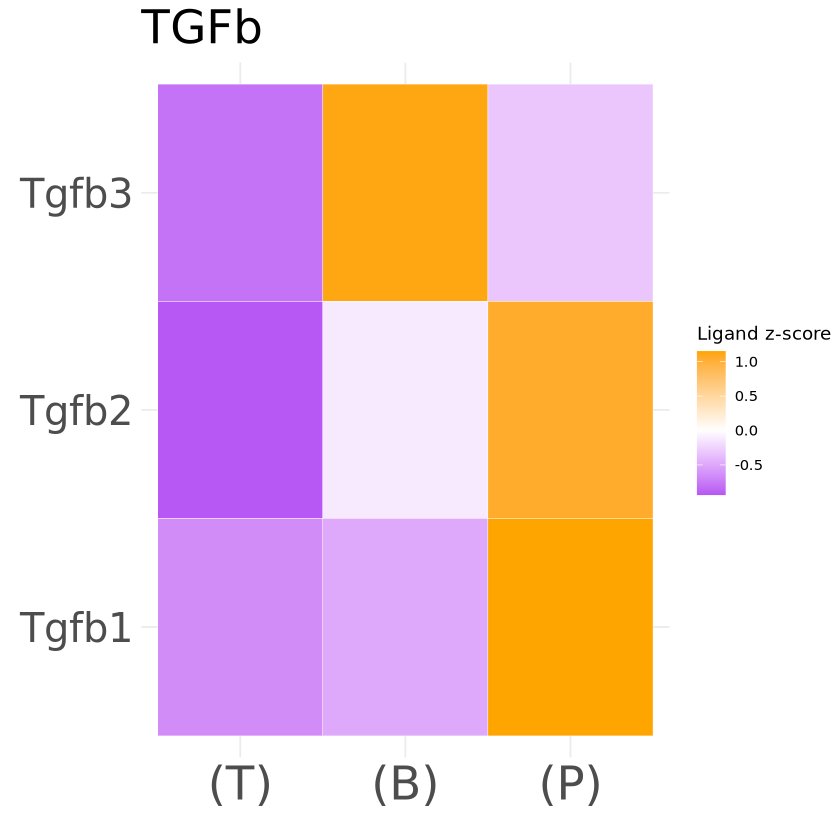

[1] "Ccl5"   "Ccl4"   "Ccl3"   "Ccl19"  "Ccl21a" "Ccl25" 


Warning message:
“Setting row names on a tibble is deprecated.”


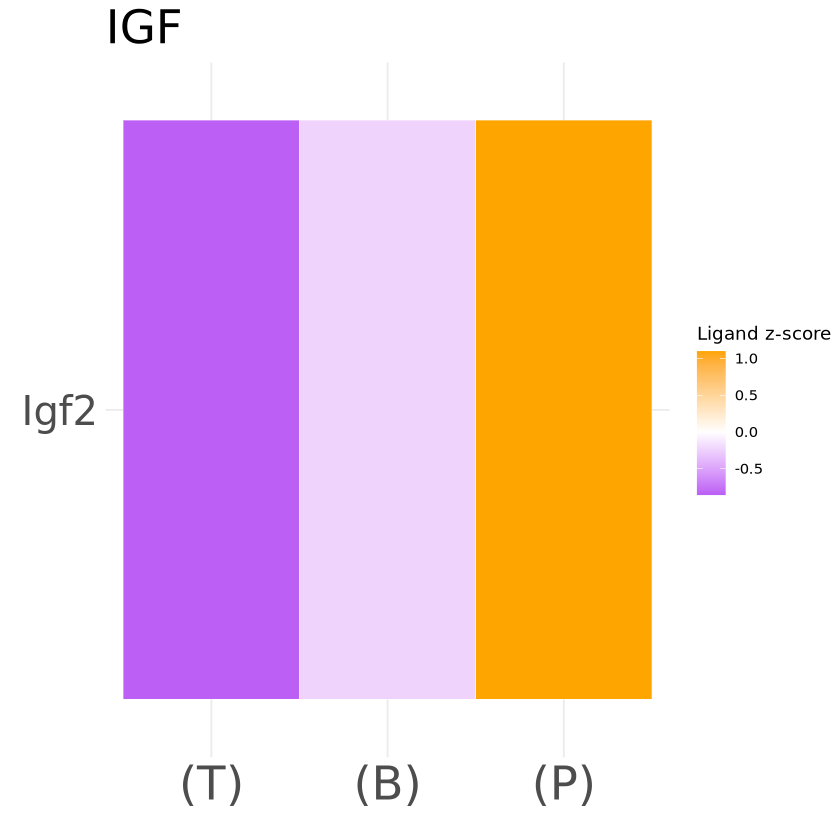

[1] "Cxcl9"  "Cxcl10" "Cxcl13" "Cxcl12" "Cxcl16"


Warning message:
“Setting row names on a tibble is deprecated.”


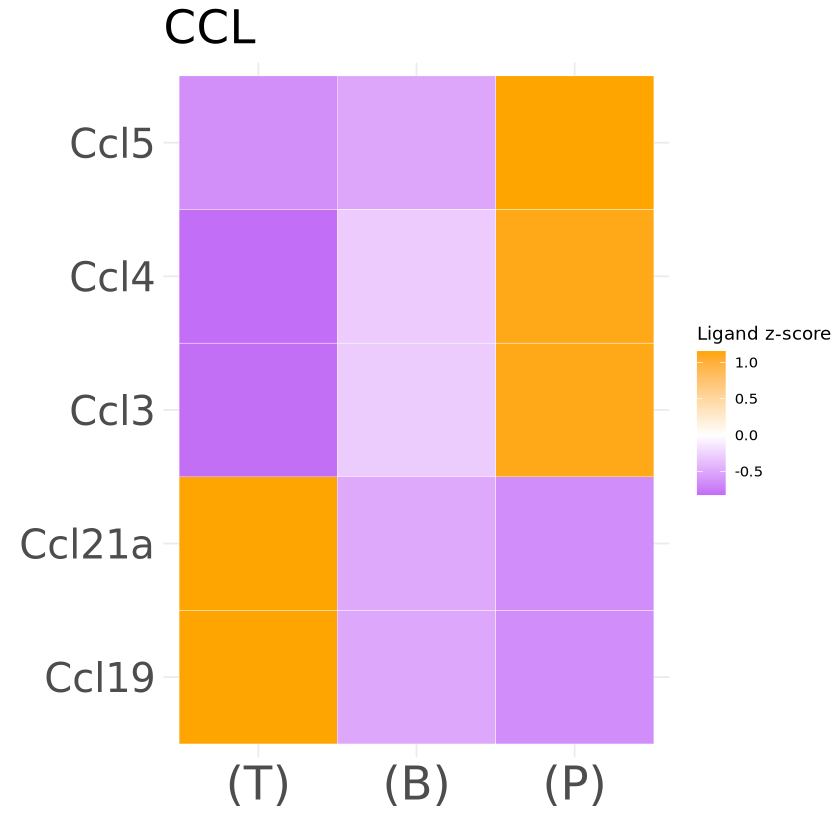

[1] "Cx3cl1"


Warning message:
“Setting row names on a tibble is deprecated.”


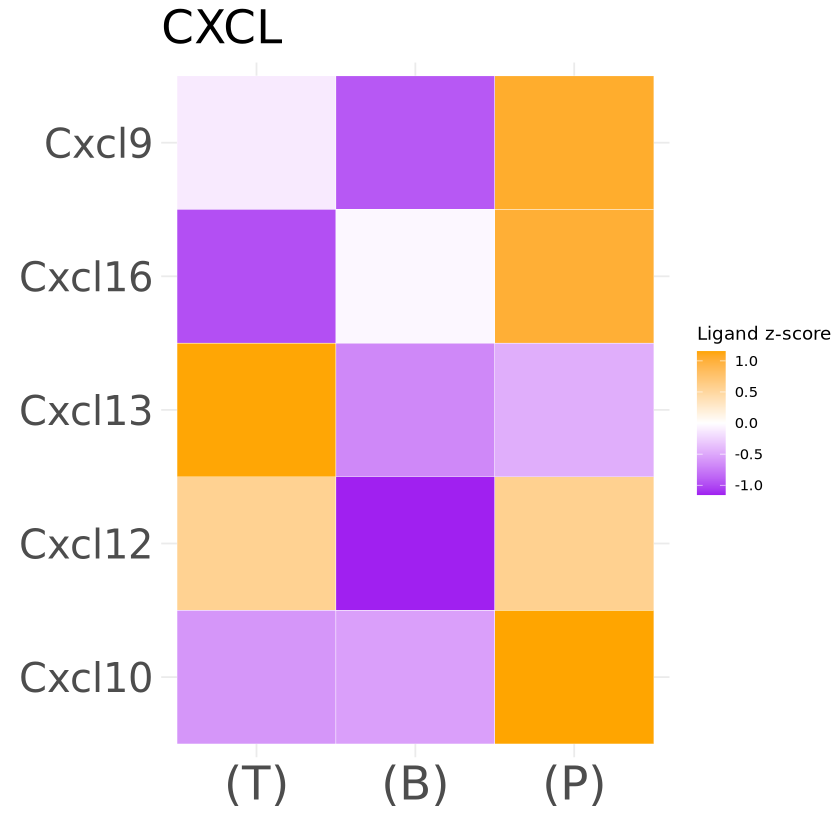

[1] "Il4"  "Il7"  "Il15" "Il21" "Tslp"


Warning message:
“Setting row names on a tibble is deprecated.”


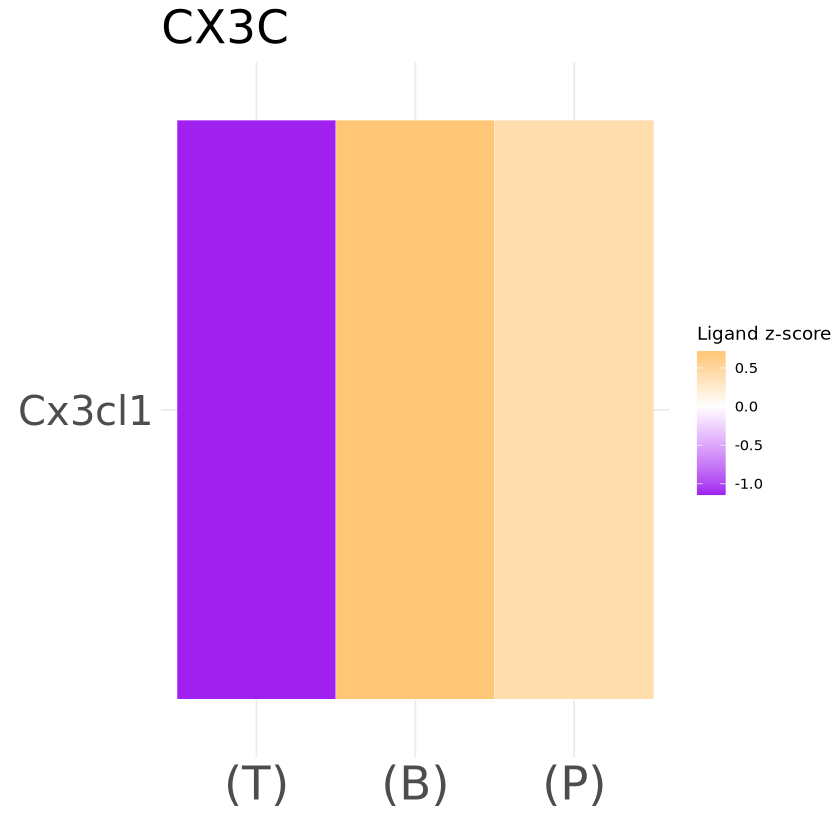

[1] "Il4"  "Il13"


Warning message:
“Setting row names on a tibble is deprecated.”


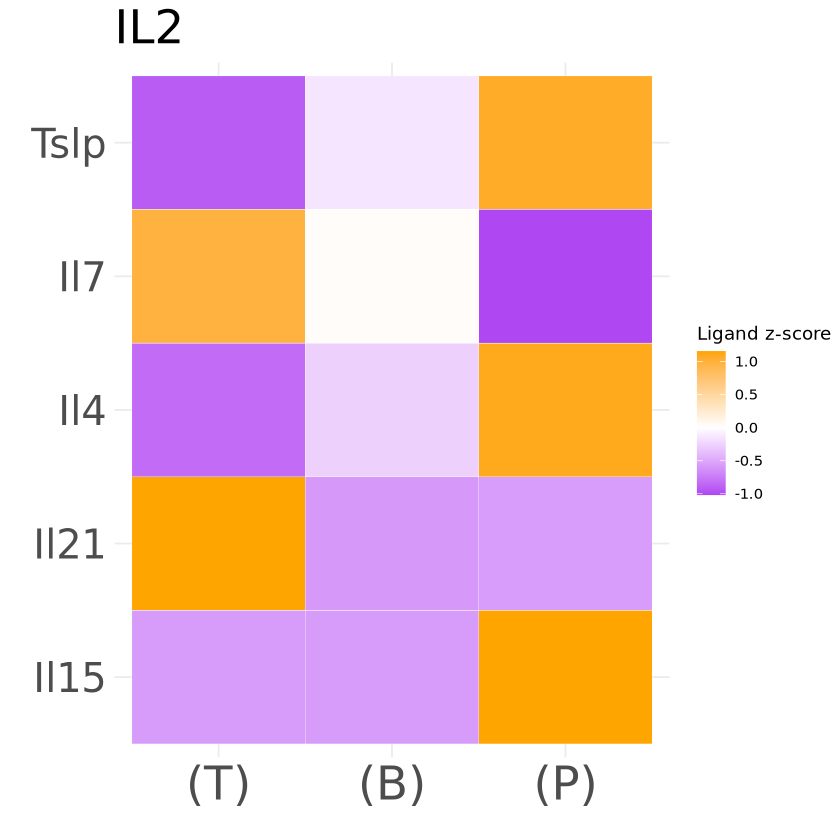

[1] "Il10"


Warning message:
“Setting row names on a tibble is deprecated.”


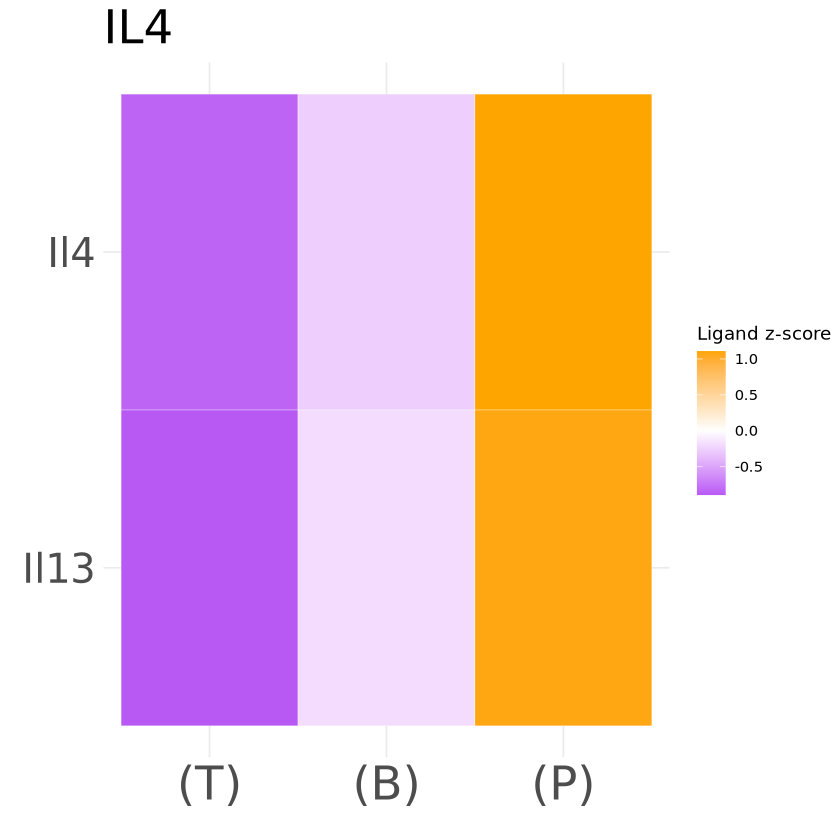

[1] "Il18"


Warning message:
“Setting row names on a tibble is deprecated.”


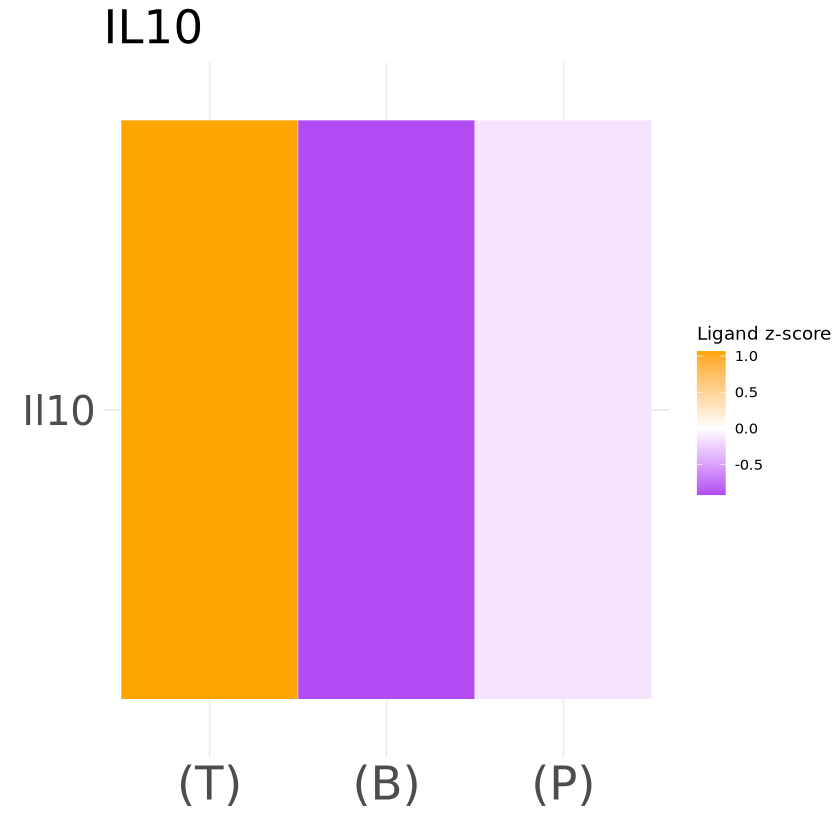

[1] "Il17a"  "Il17f"  "Il17af"


Warning message:
“Setting row names on a tibble is deprecated.”


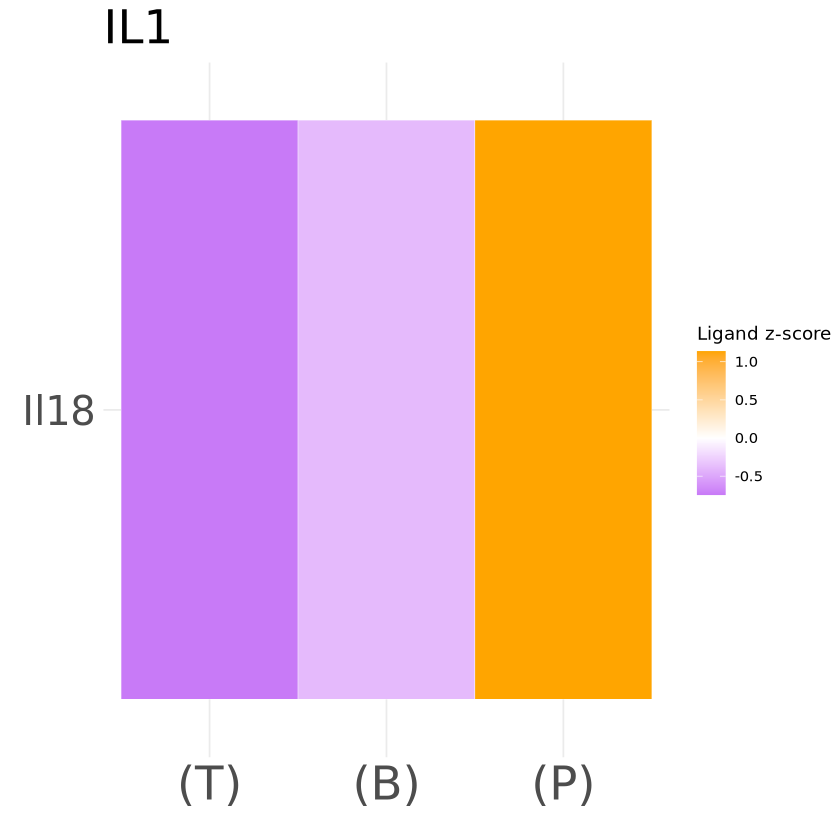

[1] "Ifng"


Warning message:
“Setting row names on a tibble is deprecated.”


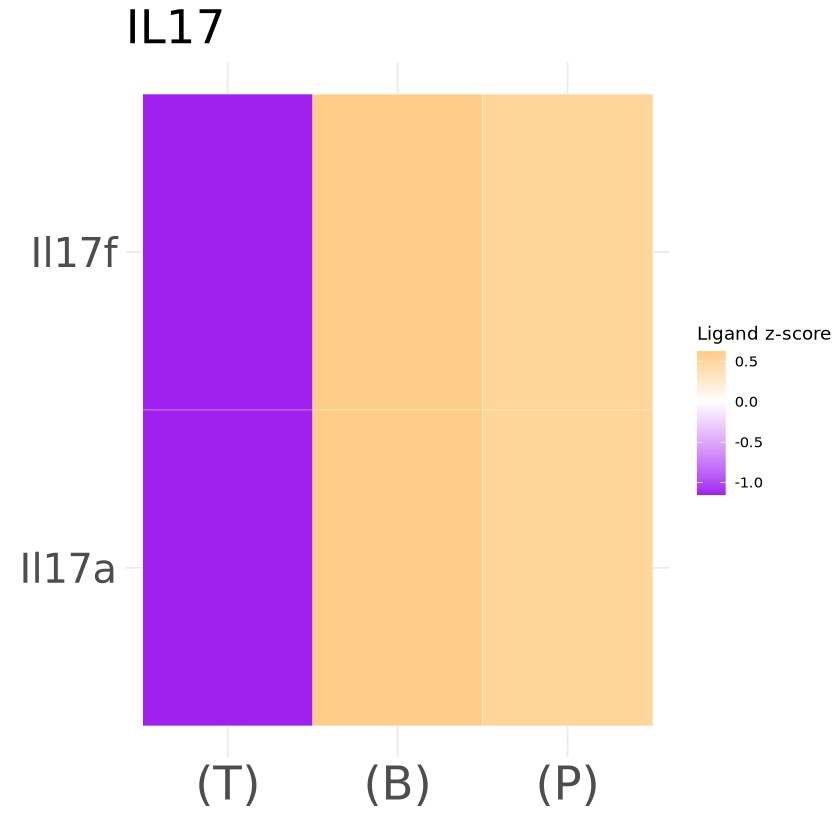

[1] "Cd40lg"


Warning message:
“Setting row names on a tibble is deprecated.”


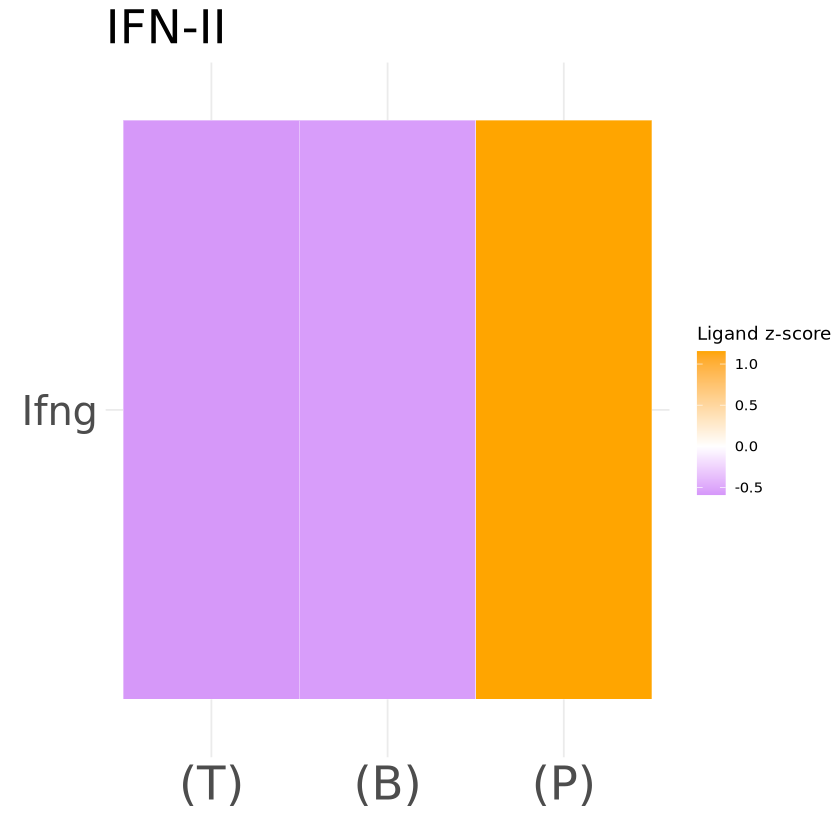

[1] "Spp1"


Warning message:
“Setting row names on a tibble is deprecated.”


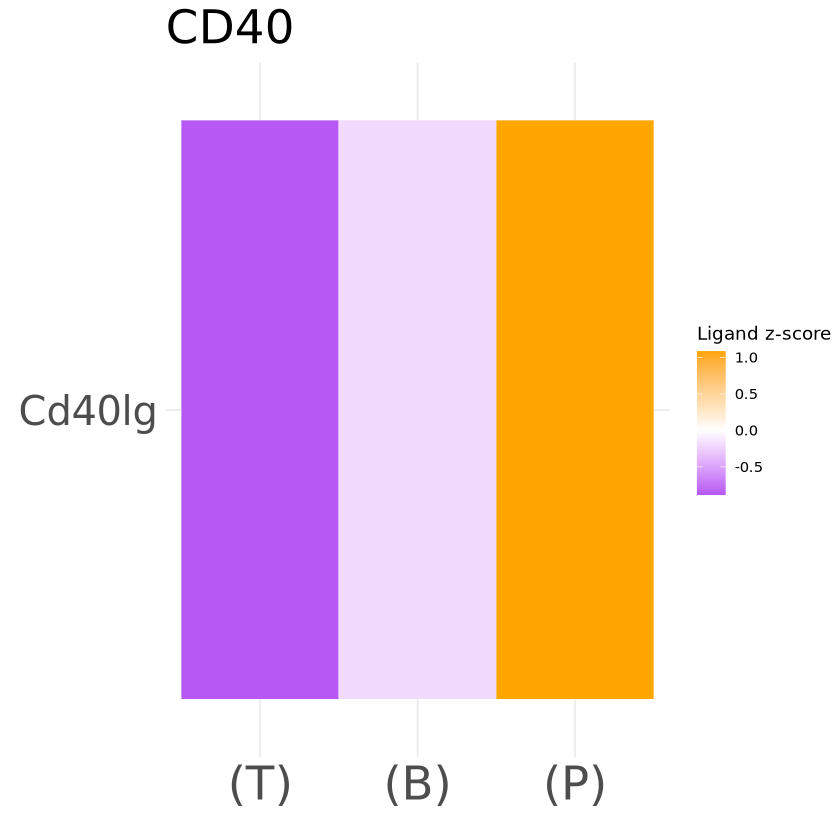

[1] "C3"


Warning message:
“Setting row names on a tibble is deprecated.”


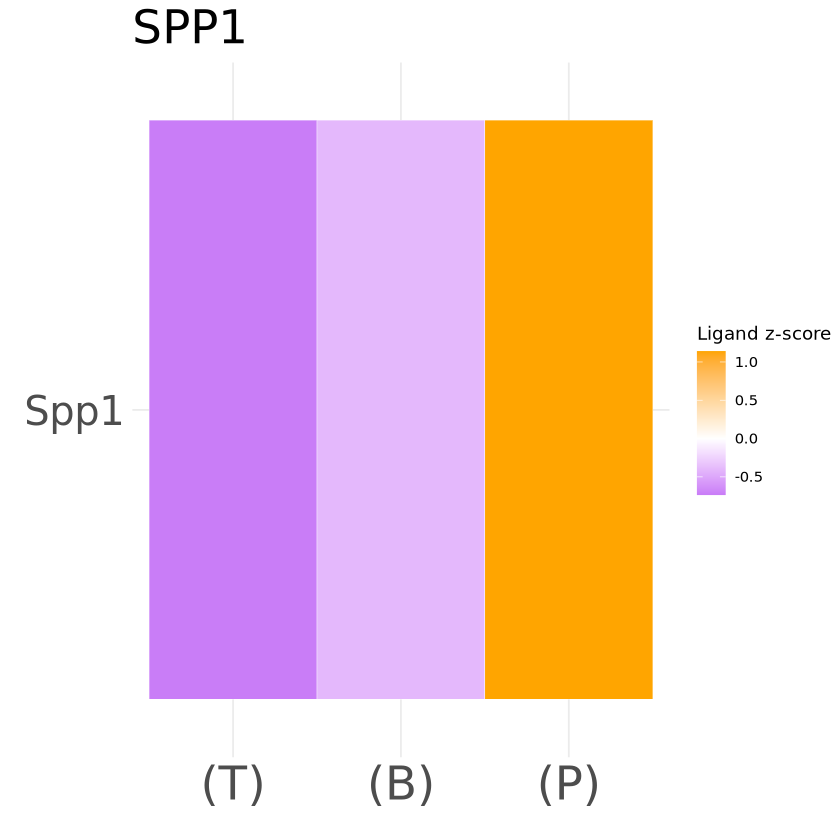

[1] "Flt3l"


Warning message:
“Setting row names on a tibble is deprecated.”


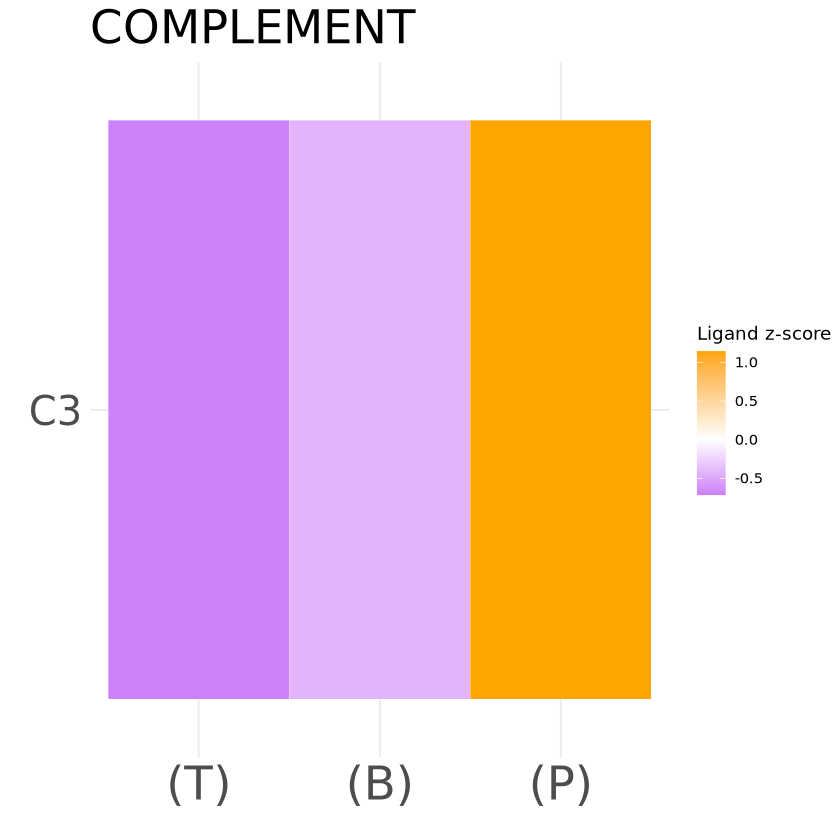

[1] "Col1a1" "Col4a1"


Warning message:
“Setting row names on a tibble is deprecated.”


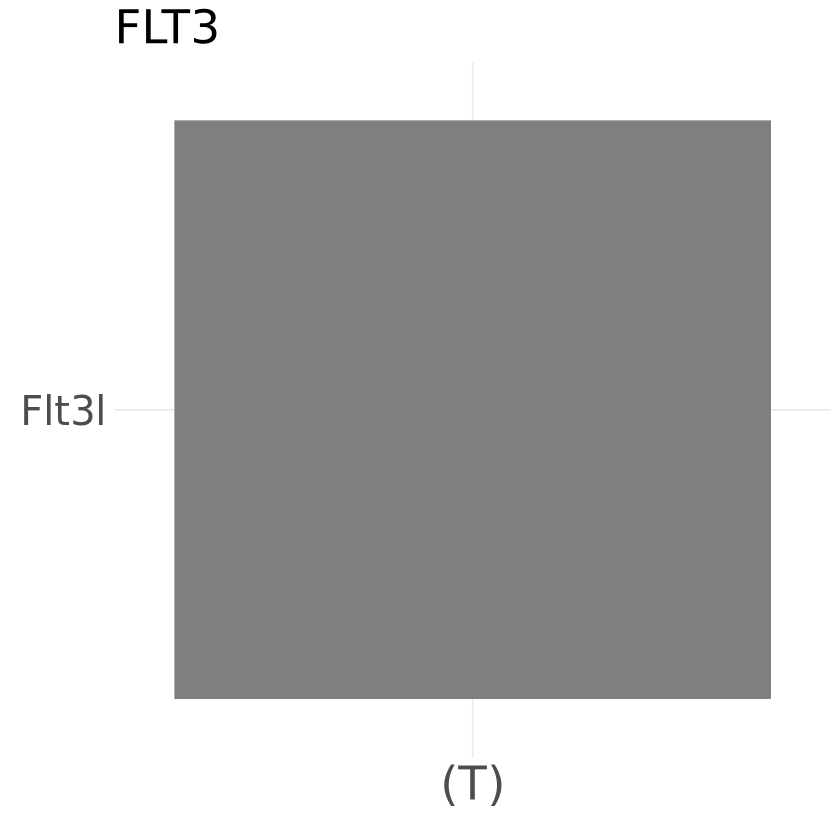

[1] "Fn1"


Warning message:
“Setting row names on a tibble is deprecated.”


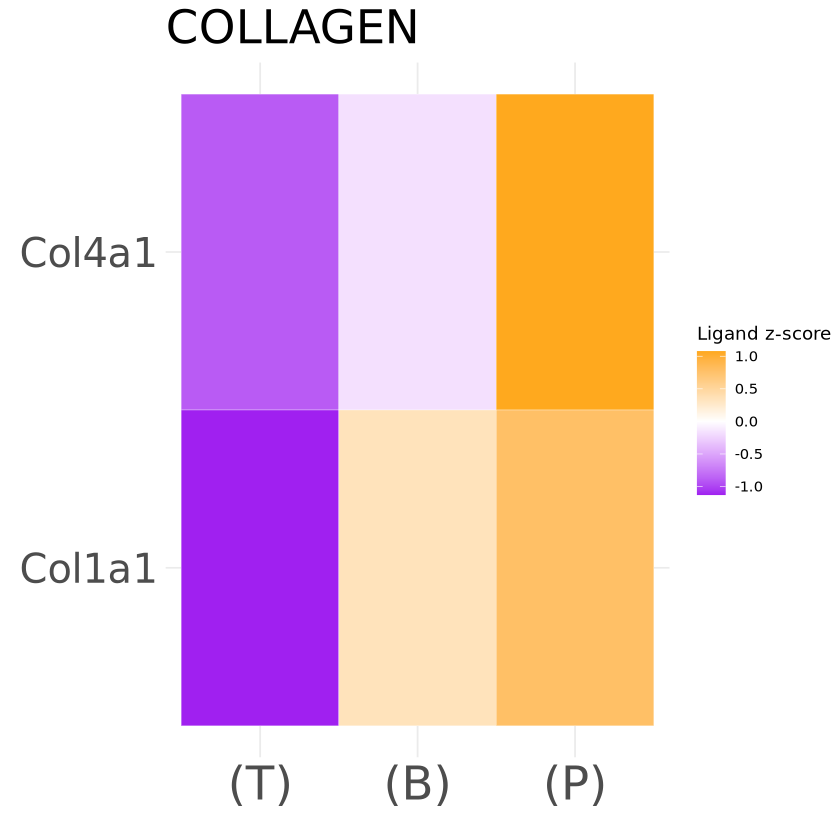

[1] "Lama1" "Lama2" "Lama3" "Lamb1" "Lamc2" "Lamc3"


Warning message:
“Setting row names on a tibble is deprecated.”


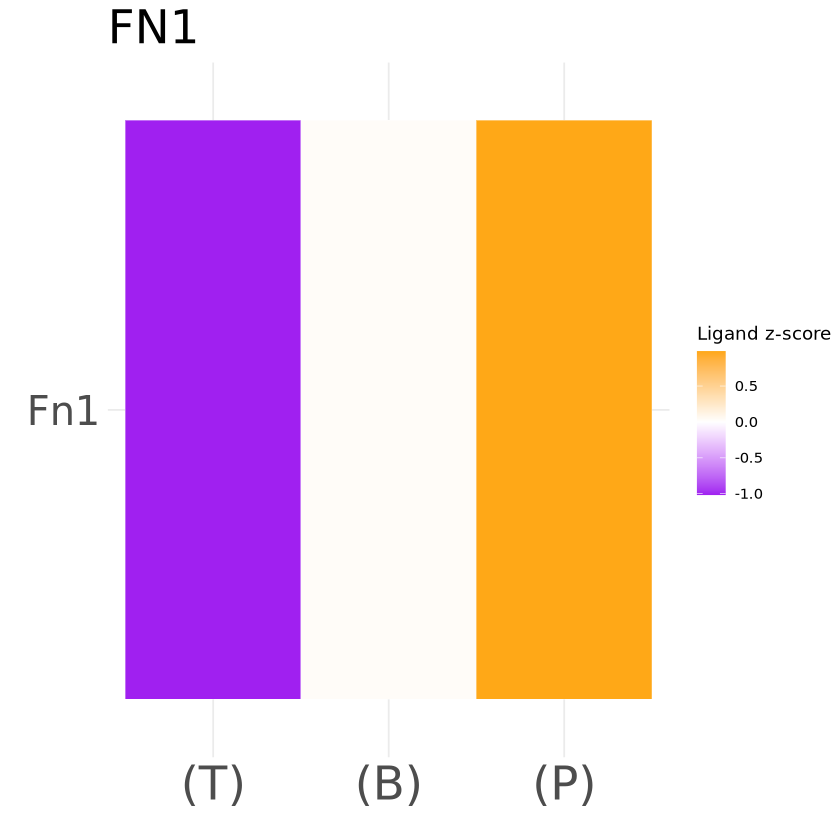

[1] "Reln"


Warning message:
“Setting row names on a tibble is deprecated.”


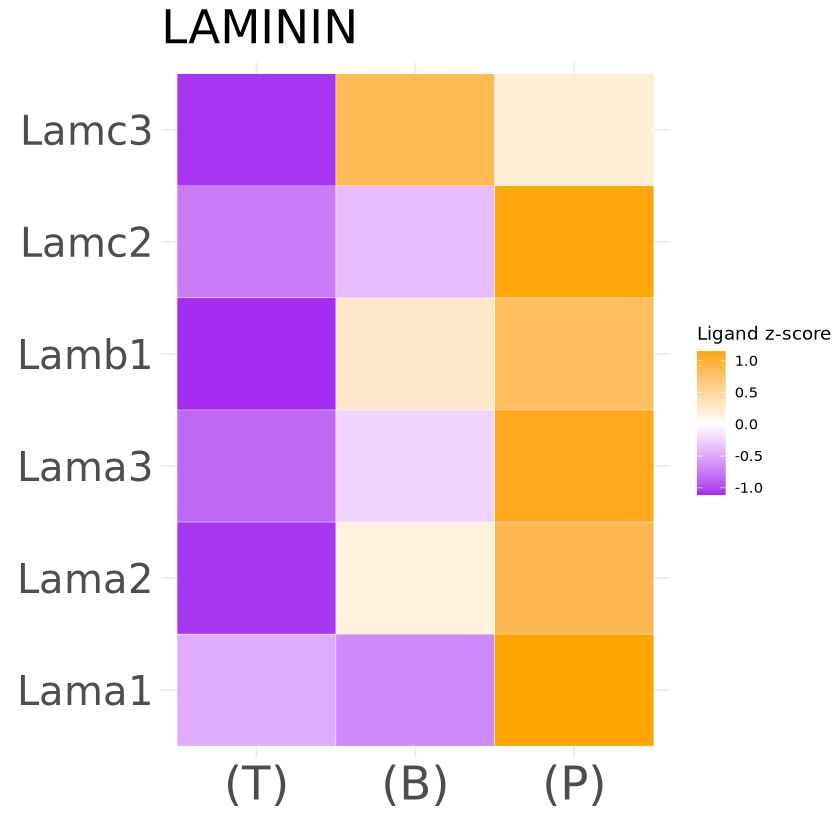

[1] "Vtn"


Warning message:
“Setting row names on a tibble is deprecated.”


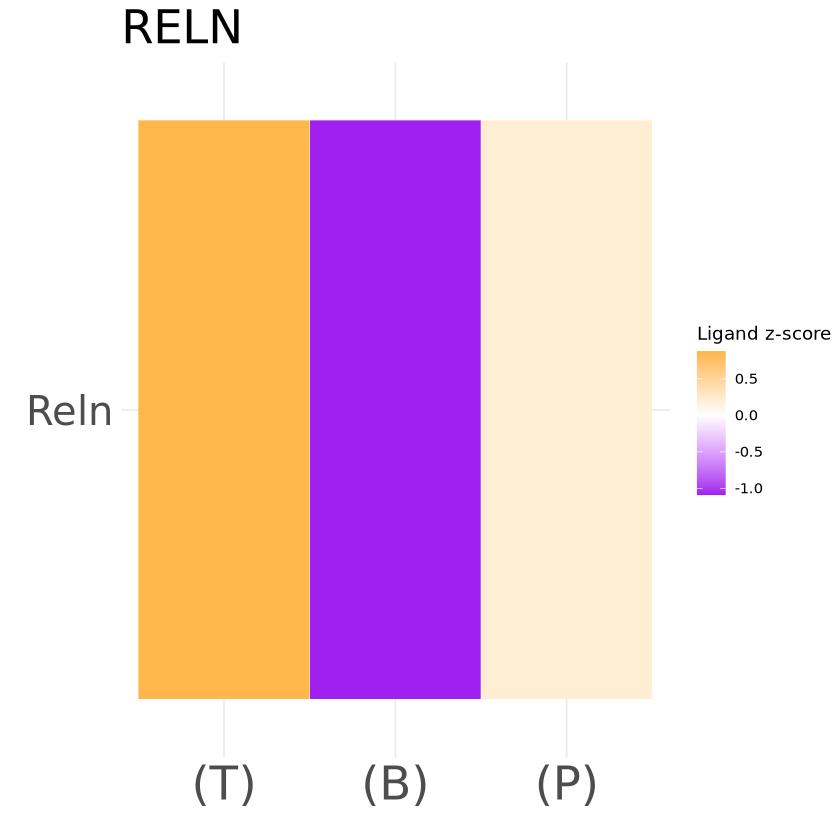

[1] "Tnc"


Warning message:
“Setting row names on a tibble is deprecated.”


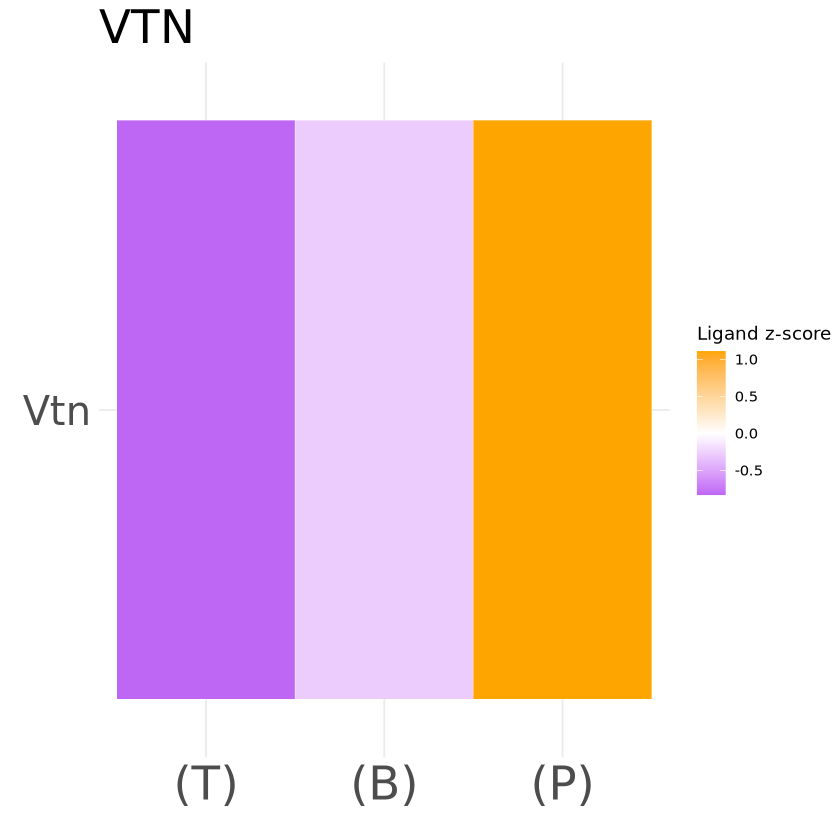

[1] "Vwf"


Warning message:
“Setting row names on a tibble is deprecated.”


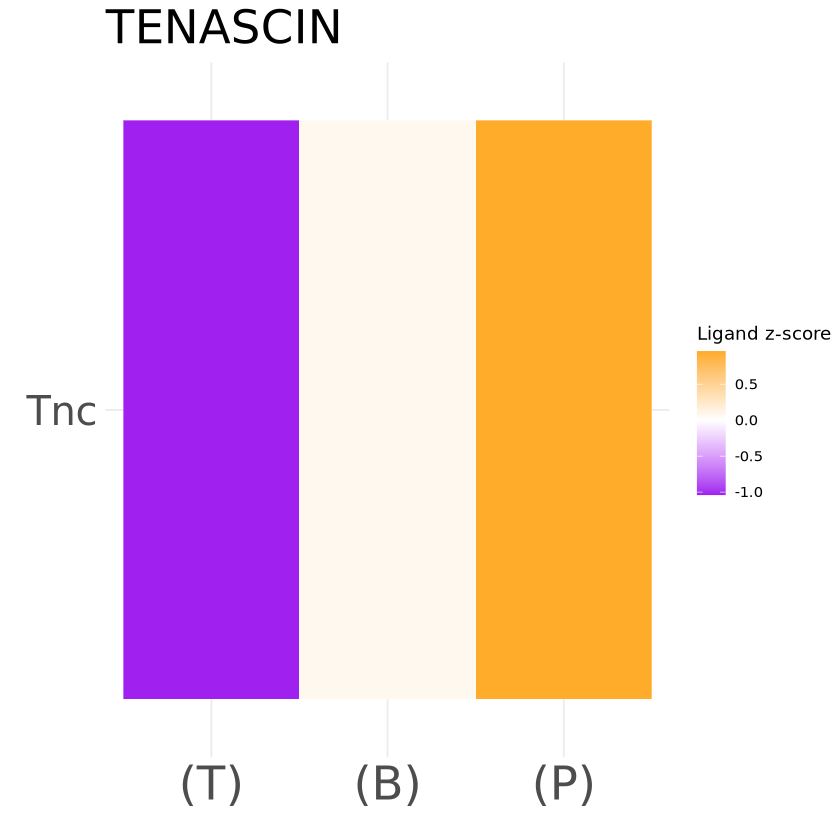

[1] "Cd80"


Warning message:
“Setting row names on a tibble is deprecated.”


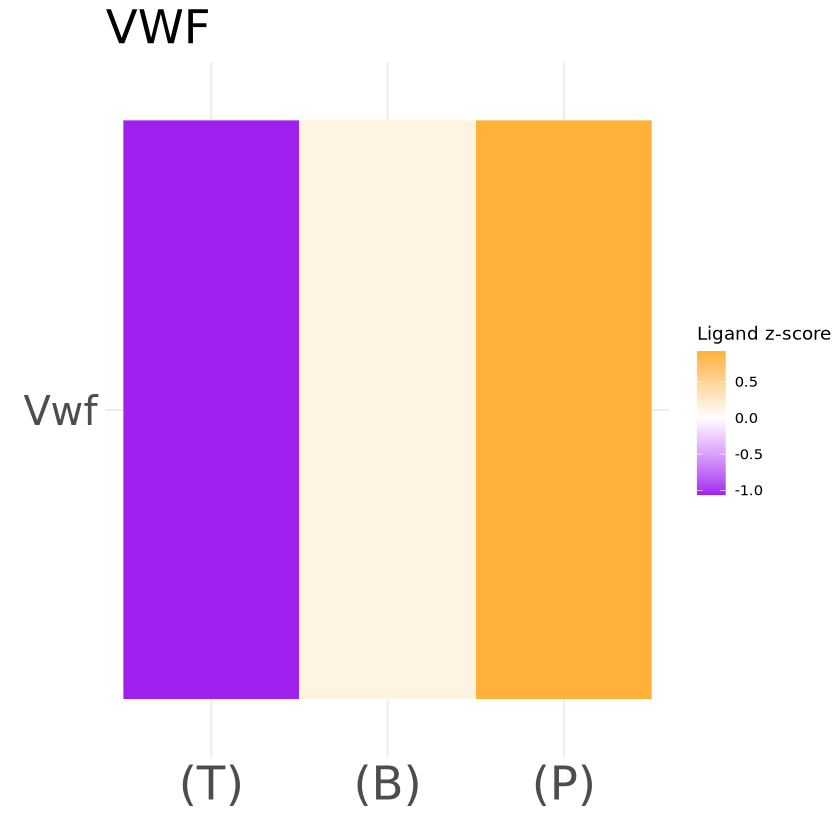

[1] "Cd86"


Warning message:
“Setting row names on a tibble is deprecated.”


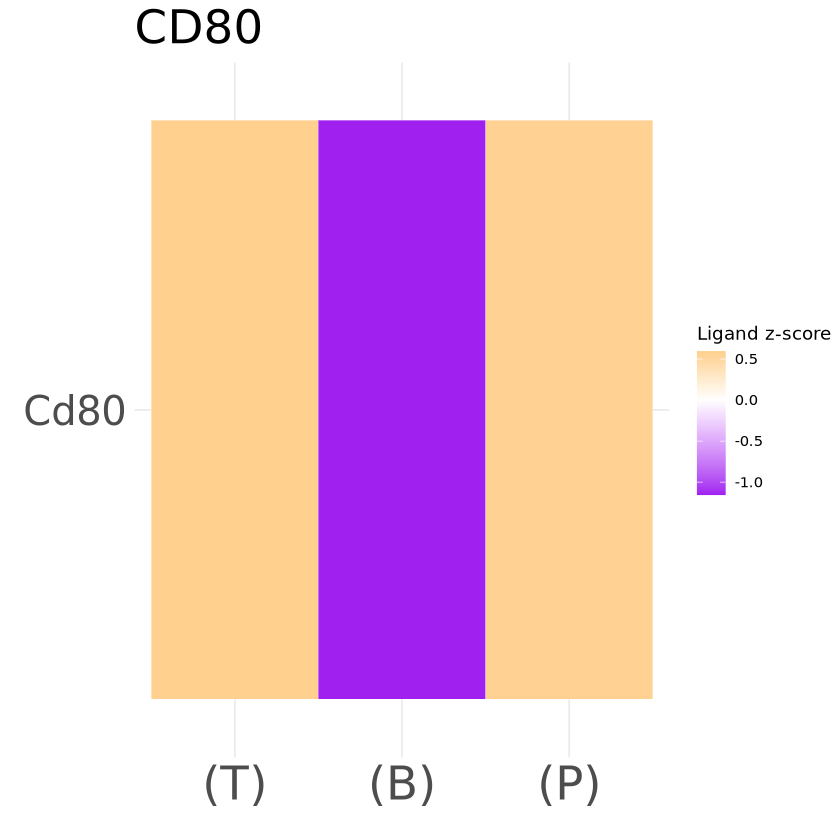

[1] "Cdh1"


Warning message:
“Setting row names on a tibble is deprecated.”


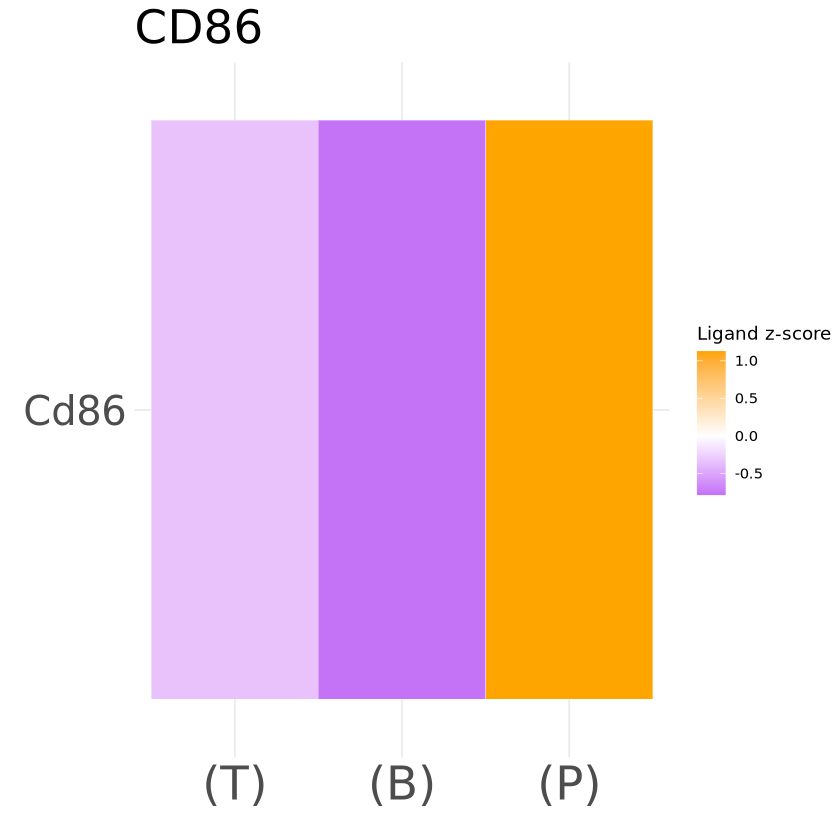

[1] "Cdh1"


Warning message:
“Setting row names on a tibble is deprecated.”


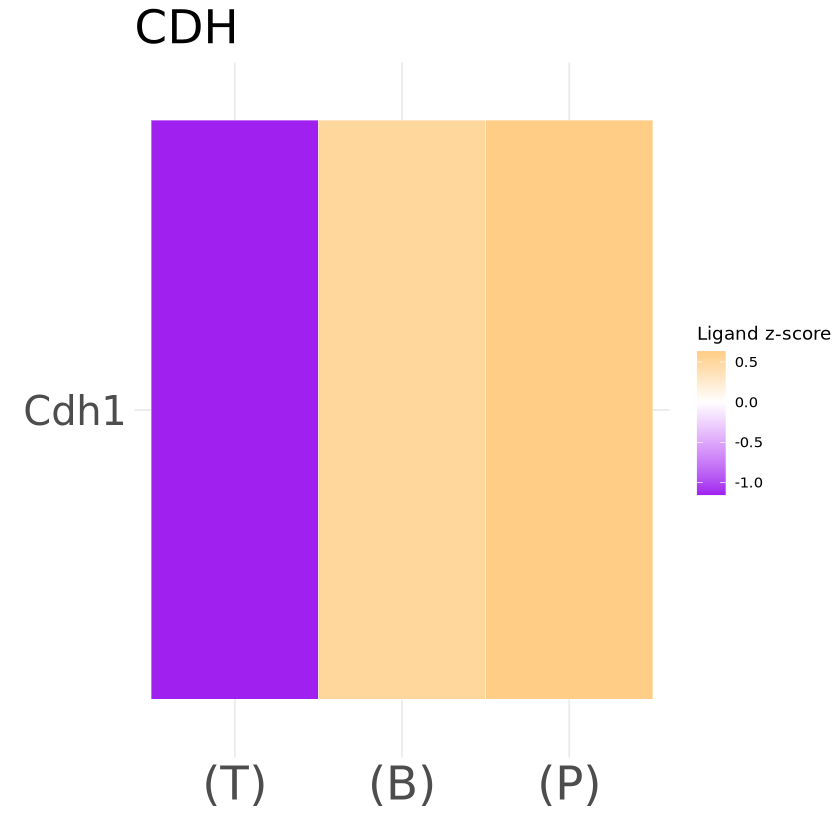

[1] "Cdh5"


Warning message:
“Setting row names on a tibble is deprecated.”


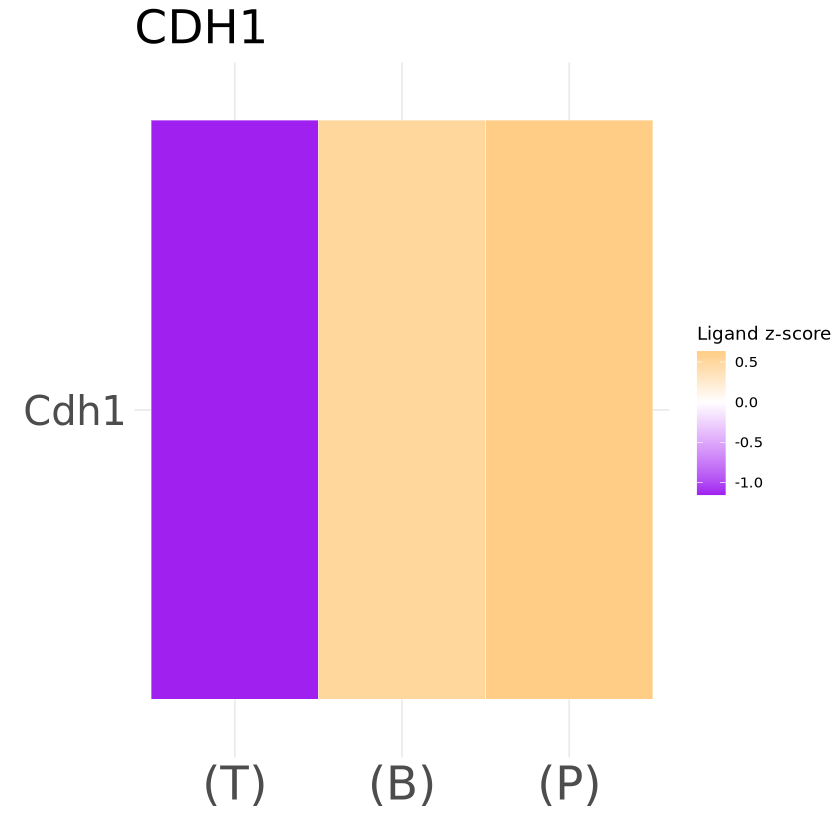

[1] "Icam1" "Icam2"


Warning message:
“Setting row names on a tibble is deprecated.”


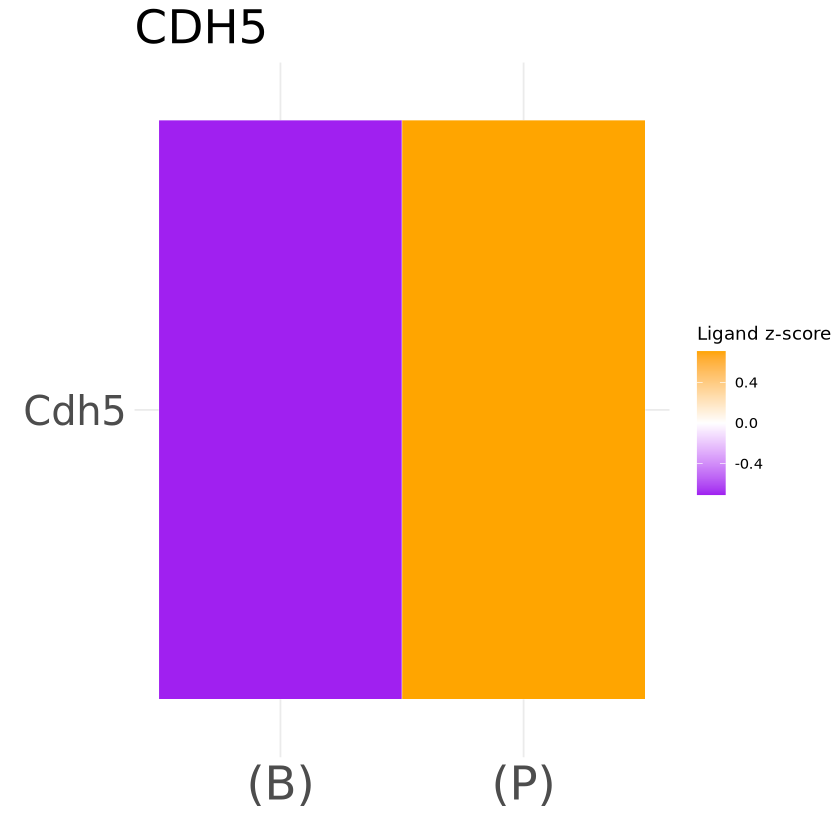

[1] "Icosl"


Warning message:
“Setting row names on a tibble is deprecated.”


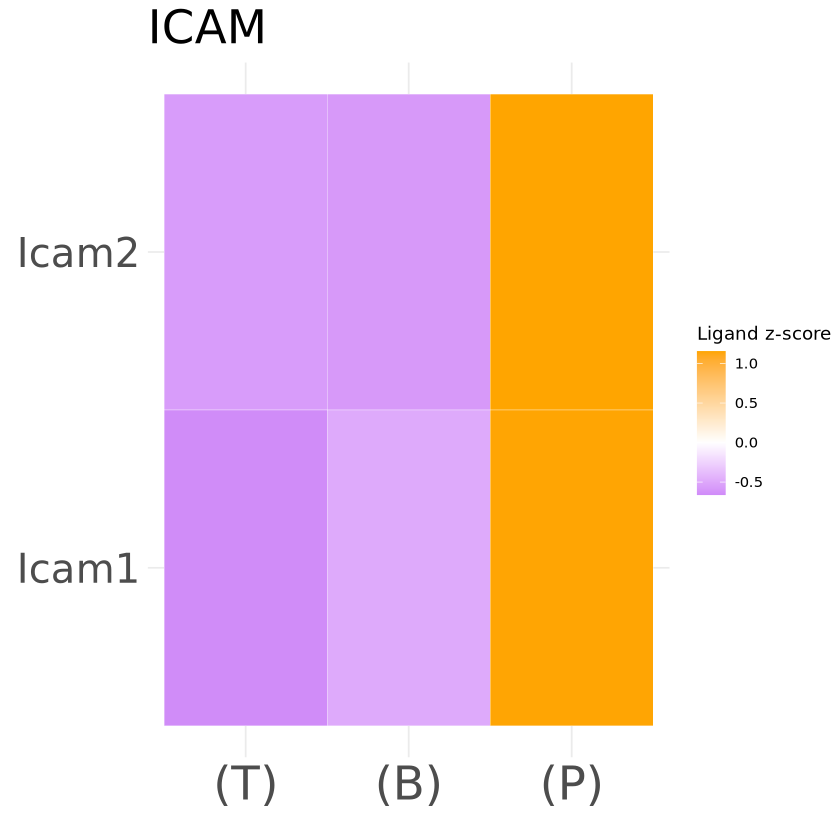

[1] "Jam2" "Jam1" "F11r" "Jam3"


Warning message:
“Setting row names on a tibble is deprecated.”


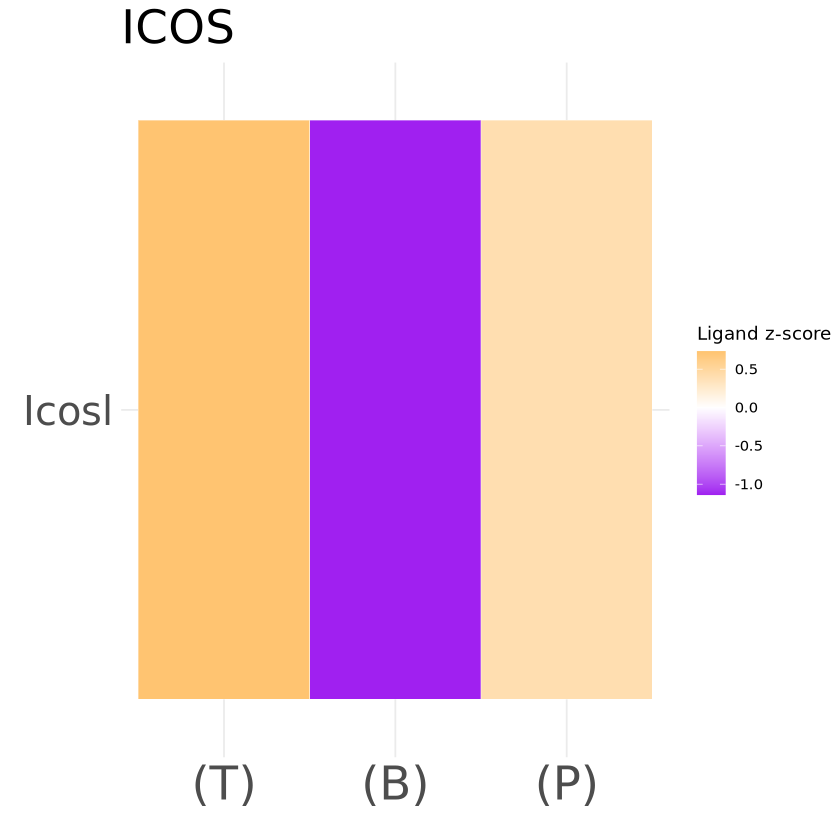

[1] "H2-ab1"  "H2-dmb2"


Warning message:
“Setting row names on a tibble is deprecated.”


ERROR: [1m[33mError[39m in `pivot_longer()`:[22m
[1m[22m[33m![39m `cols` must select at least one column.


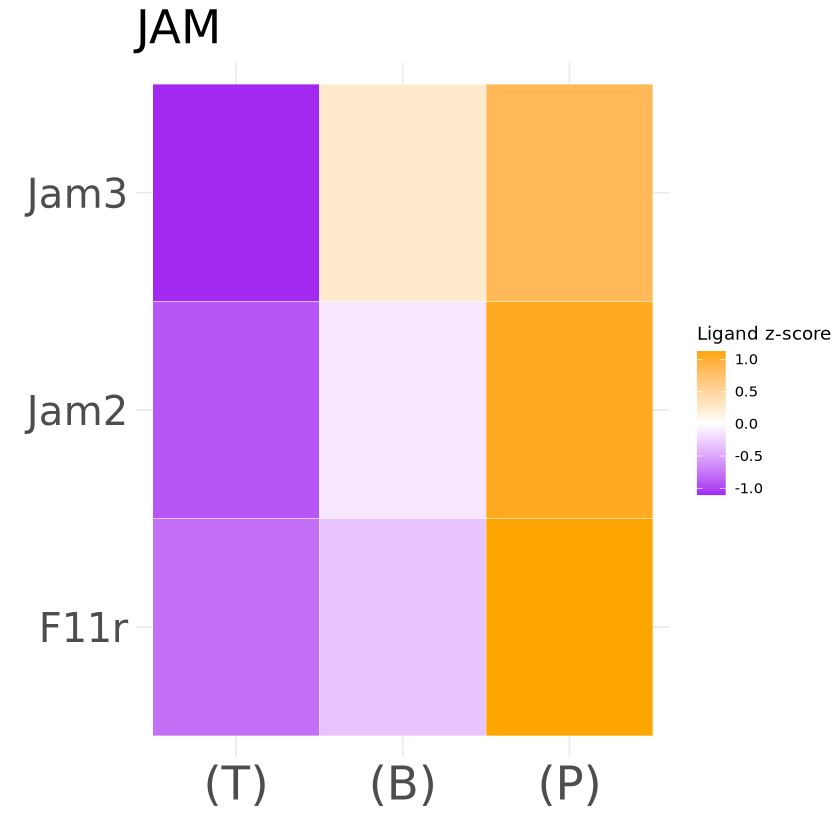

In [10]:
capitalize <- function(x) {
  sapply(x, function(s) {
    paste0(toupper(substr(s, 1, 1)), tolower(substr(s, 2, nchar(s))))
  }, USE.NAMES = FALSE)
}

for (pathway in unique(df.net.cd4$pathway_name)) {
    pairLR.use <- extractEnrichedLR(cellchat, signaling = pathway)
    pairLR.use
    ligands <- unique(sapply(strsplit(as.character(pairLR.use$interaction_name), "_"), `[`, 1))
    ligands <- capitalize(ligands)
    print(ligands)

    # Step 1: Filter and summarize (already done)
    cd4_targets <- c("CD4 act (near-TLS (T))", "CD4 act (parenchyma (P))", "CD4 act (near-bronchi (B))")
    
    df.filtered <- df.net %>%
      filter(target %in% cd4_targets, ligand %in% ligands, pval < 0.05)
    
    df.summary <- df.filtered %>%
      group_by(ligand, target) %>%
      summarise(total_prob = sum(prob, na.rm = TRUE), .groups = "drop")
    
    
    
    # Step 2: Pivot to wide format (ligands as rows, targets as columns)
    heatmap_matrix <- df.summary %>%
      pivot_wider(names_from = target, values_from = total_prob, values_fill = 0)
    row_labels <- heatmap_matrix$ligand
    
    # Step 3: Set rownames, remove ligand column, then scale across rows
    rownames(heatmap_matrix) <- heatmap_matrix$ligand
    heatmap_scaled <- heatmap_matrix[, -1]
    
    # Scale each row (ligand) using z-score
    heatmap_scaled_z <- t(scale(t(as.matrix(heatmap_scaled)), center = TRUE, scale = TRUE))
    
    # Step 4: Convert back to tidy format for ggplot
    heatmap_scaled_z_df <- as.data.frame(heatmap_scaled_z)
    heatmap_scaled_z_df$ligand = heatmap_matrix$ligand
    # heatmap_scaled_z_df$ligand <- rownames(heatmap_scaled_z_df)
    
    df.heatmap <- pivot_longer(
      heatmap_scaled_z_df,
      cols = -ligand,
      names_to = "target",
      values_to = "z_score"
    )
    
    # Step 5: Plot
    print(
    ggplot(df.heatmap, aes(x = target, y = ligand, fill = z_score)) +
      geom_tile(color = "white") +
      scale_fill_gradient2(low = "purple", mid = "white", high = "orange", midpoint = 0) +
      labs(
          title=pathway,
        x = "",
        y = "",
        fill = "Ligand z-score"
      ) +     
    scale_x_discrete(labels = c(
          "CD4 act (near-TLS (T))" = "(T)",
          "CD4 act (near-bronchi (B))" = "(B)",
          "CD4 act (parenchyma (P))" = "(P)"
        )) +
      theme_minimal() +
      theme(
          plot.title = element_text(size = 28),
        axis.text.x = element_text(size = 28),
        axis.text.y = element_text(size = 24),
      )
        )
    }


In [11]:
capitalize <- function(x) {
  sapply(x, function(s) {
    paste0(toupper(substr(s, 1, 1)), tolower(substr(s, 2, nchar(s))))
  }, USE.NAMES = FALSE)
}

# now make a heatmap with all ligands and cluster by rows 

ligands <- unique(df.net.cd4$ligand)

# Step 1: Filter and summarize (already done)
cd4_targets <- c("CD4 act (near-TLS (T))", "CD4 act (parenchyma (P))", "CD4 act (near-bronchi (B))")

df.filtered <- df.net %>%
  filter(target %in% cd4_targets, ligand %in% ligands, pval < 0.05)

df.summary <- df.filtered %>%
  group_by(ligand, target) %>%
  summarise(total_prob = sum(prob, na.rm = TRUE), .groups = "drop")



# Step 2: Pivot to wide format (ligands as rows, targets as columns)
heatmap_matrix <- df.summary %>%
  pivot_wider(names_from = target, values_from = total_prob, values_fill = 0)
row_labels <- heatmap_matrix$ligand

# Step 3: Set rownames, remove ligand column, then scale across rows
rownames(heatmap_matrix) <- heatmap_matrix$ligand
heatmap_scaled <- heatmap_matrix[, -1]

# Scale each row (ligand) using z-score
heatmap_scaled_z <- t(scale(t(as.matrix(heatmap_scaled)), center = TRUE, scale = TRUE))



# Compute row (ligand) clustering
dist_rows <- dist(heatmap_scaled_z)
clust_rows <- hclust(dist_rows, method = "complete")  # or "average", "ward.D2", etc.

# Reorder ligands by clustering
ordered_ligands <- row_labels[clust_rows$order]





# Step 4: Convert back to tidy format for ggplot
heatmap_scaled_z_df <- as.data.frame(heatmap_scaled_z)
heatmap_scaled_z_df$ligand = heatmap_matrix$ligand
# heatmap_scaled_z_df$ligand <- rownames(heatmap_scaled_z_df)

df.heatmap <- pivot_longer(
  heatmap_scaled_z_df,
  cols = -ligand,
  names_to = "target",
  values_to = "z_score"
)

df.heatmap$ligand <- factor(df.heatmap$ligand, levels = ordered_ligands)

# Step 5: Plot
# print(
p <- ggplot(df.heatmap, aes(x = target, y = ligand, fill = z_score)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "purple", mid = "white", high = "orange", midpoint = 0) +
  labs(
      # title=pathway,
    x = "",
    y = "",
    fill = "Ligand z-score"
  ) +     
scale_x_discrete(labels = c(
      "CD4 act (near-TLS (T))" = "(T)",
      "CD4 act (near-bronchi (B))" = "(B)",
      "CD4 act (parenchyma (P))" = "(P)"
    )) +
  theme_minimal() +
  theme(
      plot.title = element_text(size = 28),
    axis.text.x = element_text(size = 28),
    axis.text.y = element_text(size = 24),
  )
    # )

ggsave(
  filename = file.path(cellchat_out_dir, "summed_ligand_score_CD4_heatmap.pdf"),
  plot = p,  
  width = 6,            
  height = 18, 
  units = "in"
)
    # }


Warning message:
“Setting row names on a tibble is deprecated.”


In [134]:
heatmap_matrix

ligand      CD4 act (near-TLS (T)) CD4 act (near-bronchi (B))
1  C3          2.377650e-02           2.931996e-02              
2  Ccl19       6.092144e-05           0.000000e+00              
3  Ccl21a      1.502549e-04           0.000000e+00              
4  Ccl3        1.423552e-04           2.876484e-04              
5  Ccl4        1.589292e-04           2.883325e-04              
6  Ccl5        7.098802e-03           7.374724e-03              
7  Cd274       4.366872e-03           3.019646e-03              
8  Cd40lg      2.718554e-03           4.482156e-03              
9  Cd80        3.187821e-03           2.231009e-03              
10 Cd86        1.645855e-02           1.536590e-02              
11 Cdh1        1.265644e-02           3.394777e-02              
12 Cdh5        0.000000e+00           1.111445e-02              
13 Col1a1      6.810327e-02           1.090296e-01              
14 Col4a1      6.262372e-02           1.100379e-01              
15 Cxcl12      5.751269e-02           4.483306e-02              
16 Cxcl13      1.675029e-03           1.565283e-04              
17 Cxcl16      3.153381e-02           5.024099e-02              
18 Cxcl9       1.219028e-04           1.003208e-04              
19 Dll1        5.115514e-03           5.854825e-03              
20 Dll4        8.192519e-03           1.231009e-02              
21 F11r        4.202254e-02           5.203754e-02              
22 Fn1         2.495132e-01           3.803476e-01              
23 H2-Ab1      1.165906e-01           1.084793e-01              
24 H2-DMb2     5.948478e-02           4.385761e-02              
25 ITGA4_ITGB1 1.626629e-02           1.750127e-02              
26 ITGA4_ITGB7 1.269065e-02           1.312955e-02              
27 ITGA9_ITGB1 3.880883e-03           5.369257e-03              
28 Icam1       1.458644e-01           1.554678e-01              
29 Icam2       3.080926e-02           2.587911e-02              
30 Icosl       6.954473e-02           5.563746e-02              
31 Ifng        4.083756e-05           4.151551e-05              
32 Igf2        2.106882e-05           2.965256e-05              
33 Il18        9.703533e-04           1.314036e-03              
34 Il4         1.238759e-03           1.653059e-03              
35 Il7         1.043441e-03           8.349548e-04              
36 Jam2        1.306490e-02           2.061094e-02              
37 Jam3        4.046723e-04           7.359110e-04              
38 Lama1       3.089290e-04           2.848098e-04              
39 Lama2       2.792191e-02           4.719868e-02              
40 Lama3       1.336263e-02           2.271301e-02              
41 Lamb1       3.338372e-02           5.318555e-02              
42 Lamc2       1.640856e-02           2.632838e-02              
43 Lamc3       1.125896e-03           1.863519e-03              
44 Pdcd1lg2    2.391922e-03           1.229671e-03              
45 Pecam1      1.079225e-02           1.410065e-02              
46 Reln        2.673220e-03           2.330508e-03              
47 Sell        3.870038e-03           5.354474e-03              
48 Spp1        3.248036e-02           5.144431e-02              
49 Tgfb1       4.797417e-02           4.897707e-02              
50 Tgfb2       4.268109e-03           5.154265e-03              
51 Tgfb3       1.243802e-02           2.089696e-02              
52 Thy1        5.478461e-02           6.314820e-02              
53 Tnc         5.286296e-03           1.930810e-02              
54 Tslp        3.819975e-04           4.837821e-04              
55 Vtn         2.386999e-03           4.162951e-03              
56 Vwf         6.964614e-03           1.571713e-02              
   CD4 act (parenchyma (P))
1  6.171425e-02            
2  0.000000e+00            
3  0.000000e+00            
4  6.454775e-04            
5  5.615003e-04            
6  1.202528e-02            
7  5.579260e-03            
8  4.974876e-03            
9  3.031850e-03            
10 1.789508e-02   

In [ ]:


# for (lig in unique(df.net.cd4$ligand)) {
for (lig in unique(ligands)) {
            
    df.ligand <- df.net.cd4 %>% filter(ligand == lig)
    print(dim(df.ligand))
    df.ligand <- df.ligand %>% filter(pval < 0.05)
    print(dim(df.ligand))
    
    df.ligand.summary <- df.ligand %>%
      group_by(target) %>%
      summarise(total_prob = sum(prob, na.rm = TRUE)) %>%
      ungroup()

    print(
    ggplot(df.ligand.summary, aes(x = target, y = total_prob)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      labs(
        title = paste0(lig), # "Total Ligand Signaling to CD4 act: ", 
        x = "",
        y = "Summed Interaction Probability"
      ) +
    scale_x_discrete(labels = c(
      "CD4 act (near-TLS (T))" = "(T)",
      "CD4 act (near-bronchi (B))" = "(B)",
      "CD4 act (parenchyma (P))" = "(P)"
    )) +
      theme_minimal()+
        theme(
      plot.title = element_text(size = 36),
      axis.title = element_text(size = 18),
      axis.text.y = element_text(size = 18),
    axis.text.x = element_text(size = 28)
    ))
    }

In [8]:
# netVisual_chord_gene(
#   cellchat,
#   signaling = "TGFb",
#   sources.use = NULL,
#   targets.use = c("CD4 act (TLS)", "CD4 act (parenchyma)", "CD4 act (adventitia)"),
#   lab.cex = 1.2
# )

interaction_name
1 PDCD1LG2_PDCD1

Comparing communications on a single object 


Comparing communications on a single object 




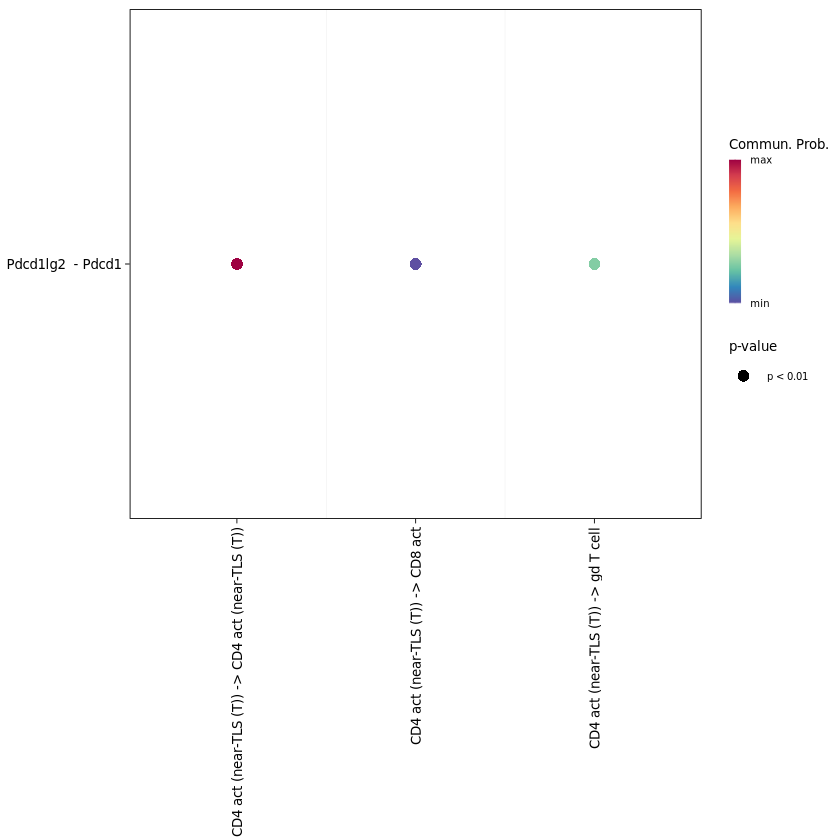

Comparing communications on a single object 




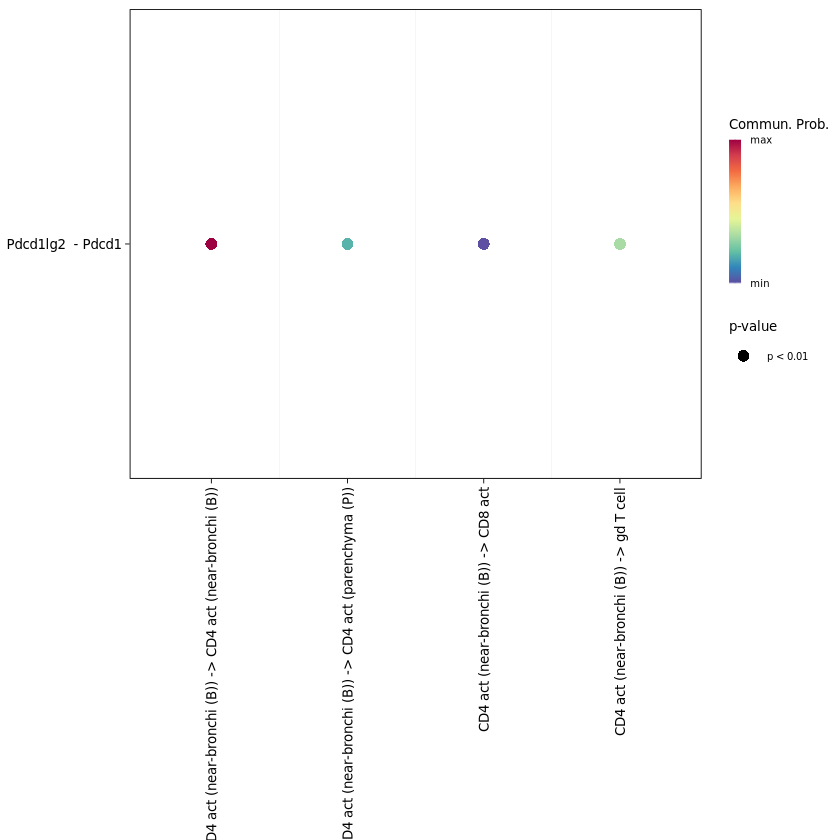

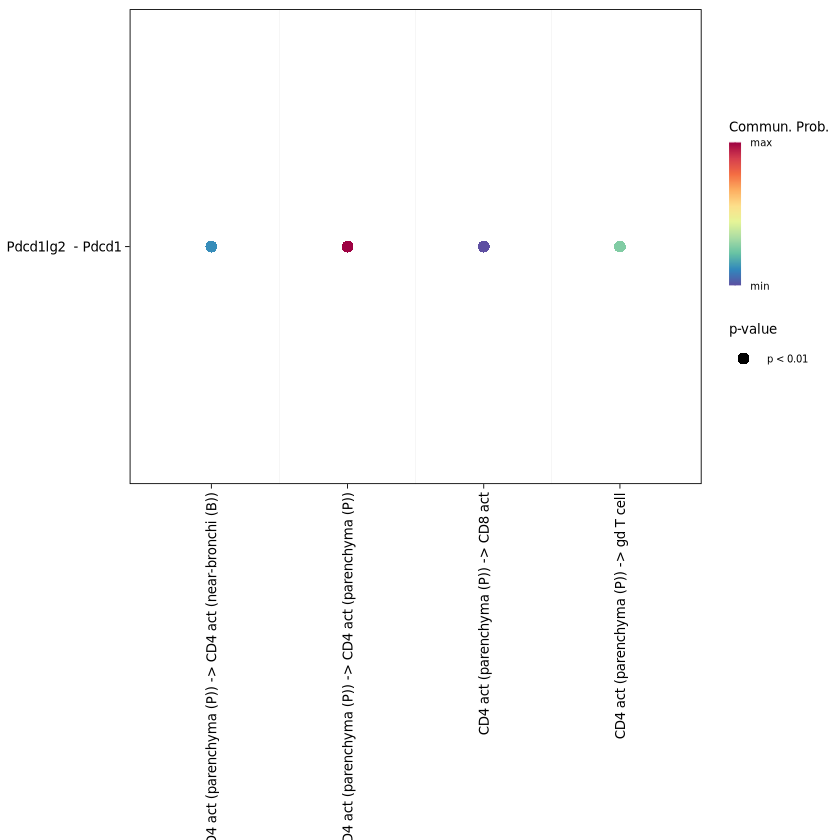

In [12]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("PDL2"))
pairLR.use

netVisual_bubble(
  cellchat,
  sources.use = c('CD4 act (near-TLS (T))'), # or your sender cells of interest
  targets.use = NULL,
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = c('CD4 act (near-bronchi (B))'),
  targets.use = NULL,
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = c('CD4 act (parenchyma (P))'),
  targets.use = NULL,
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

interaction_name
1 CD274_PDCD1

Comparing communications on a single object 


Comparing communications on a single object 




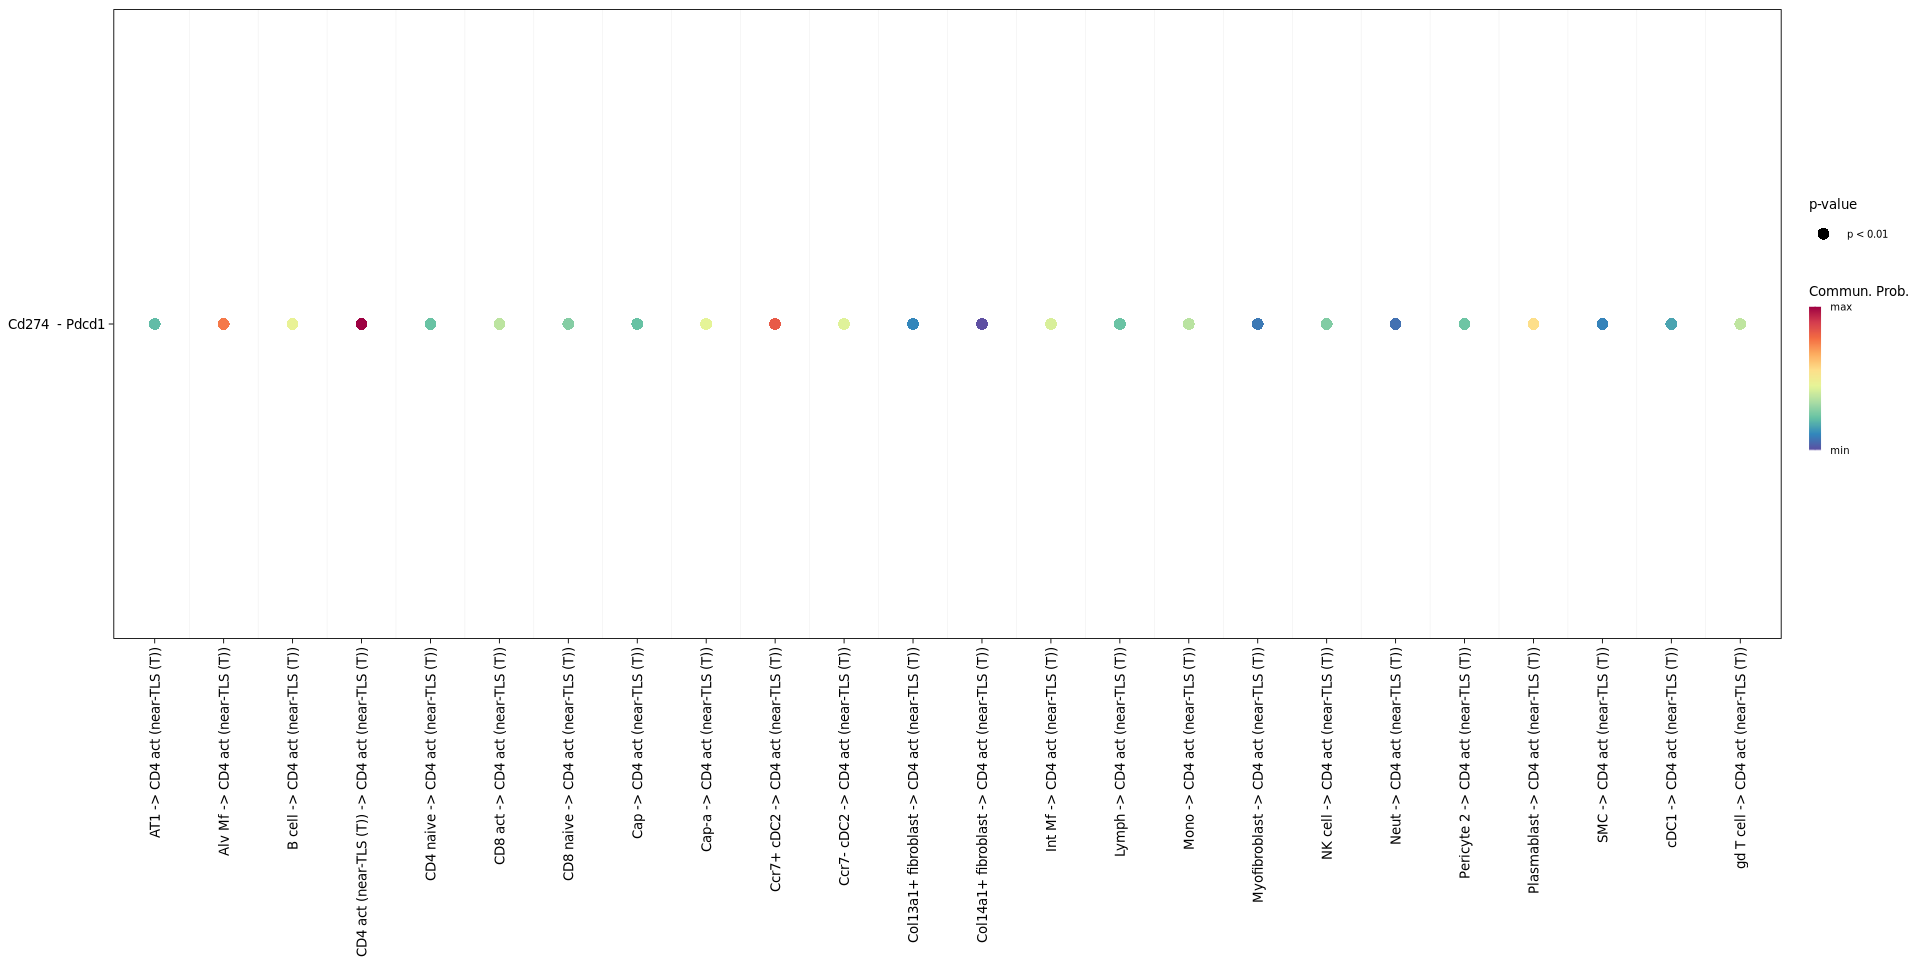

Comparing communications on a single object 




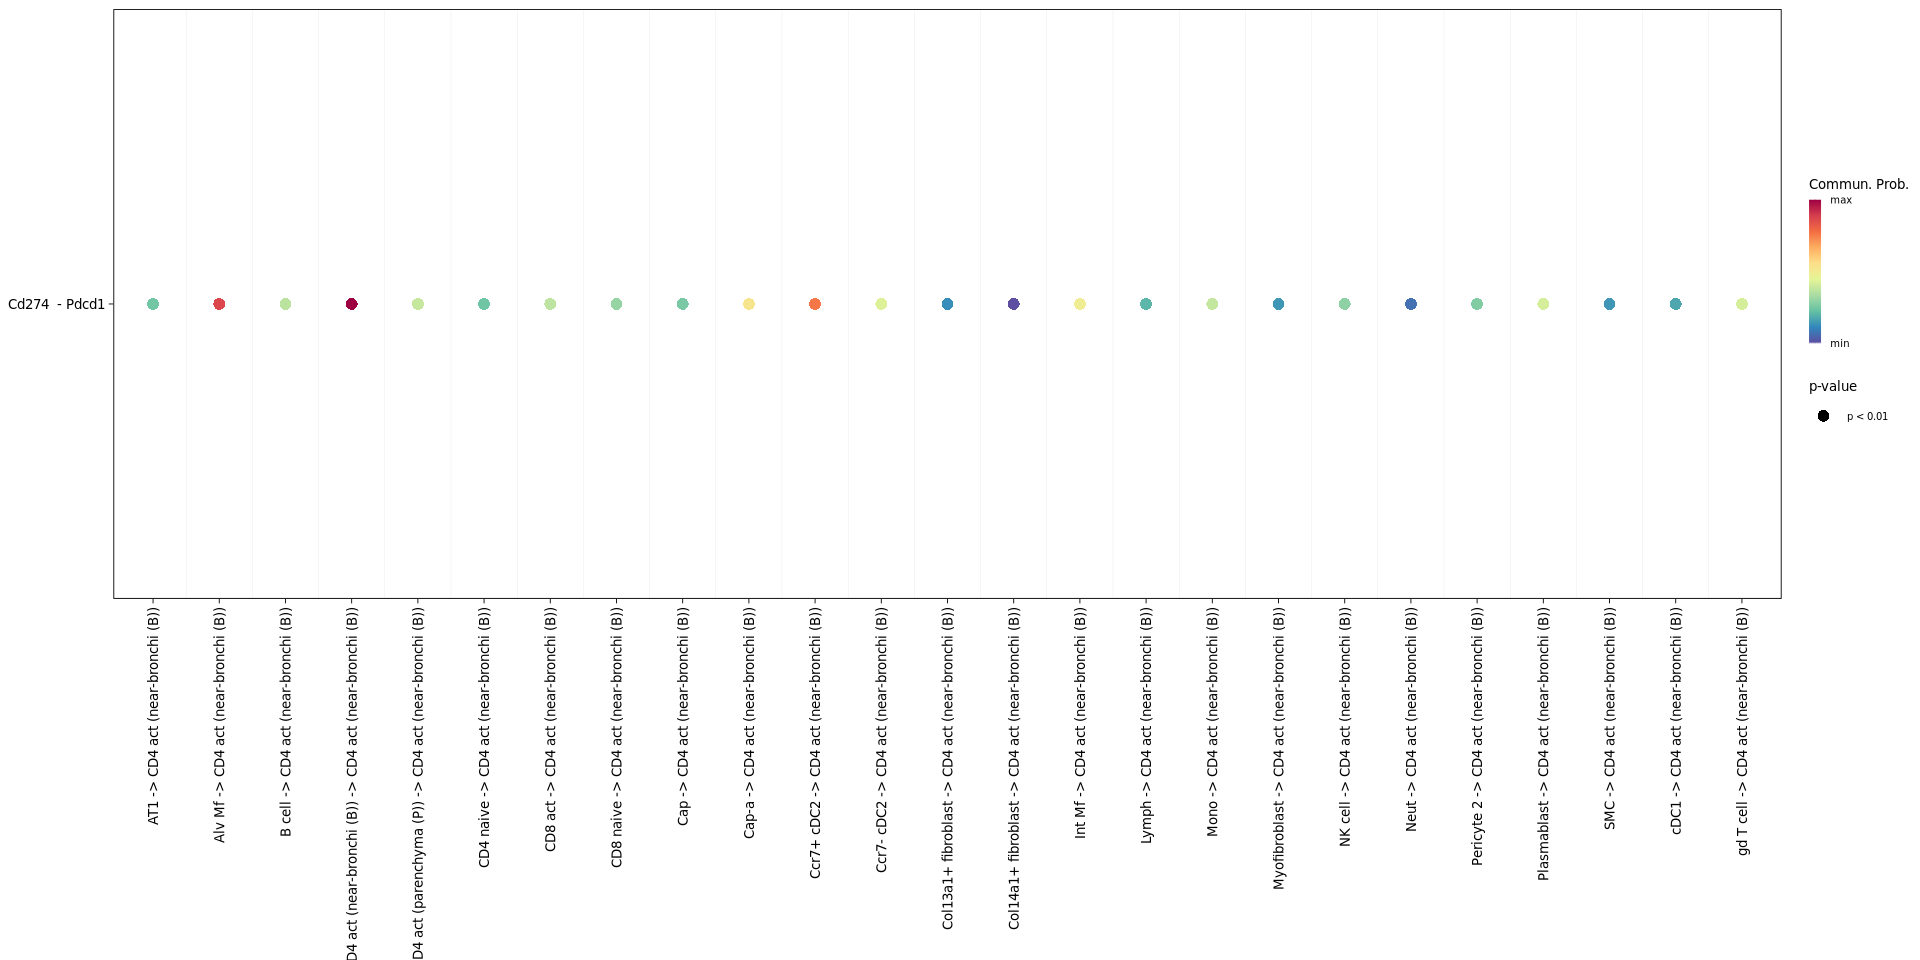

Comparing communications on a single object 




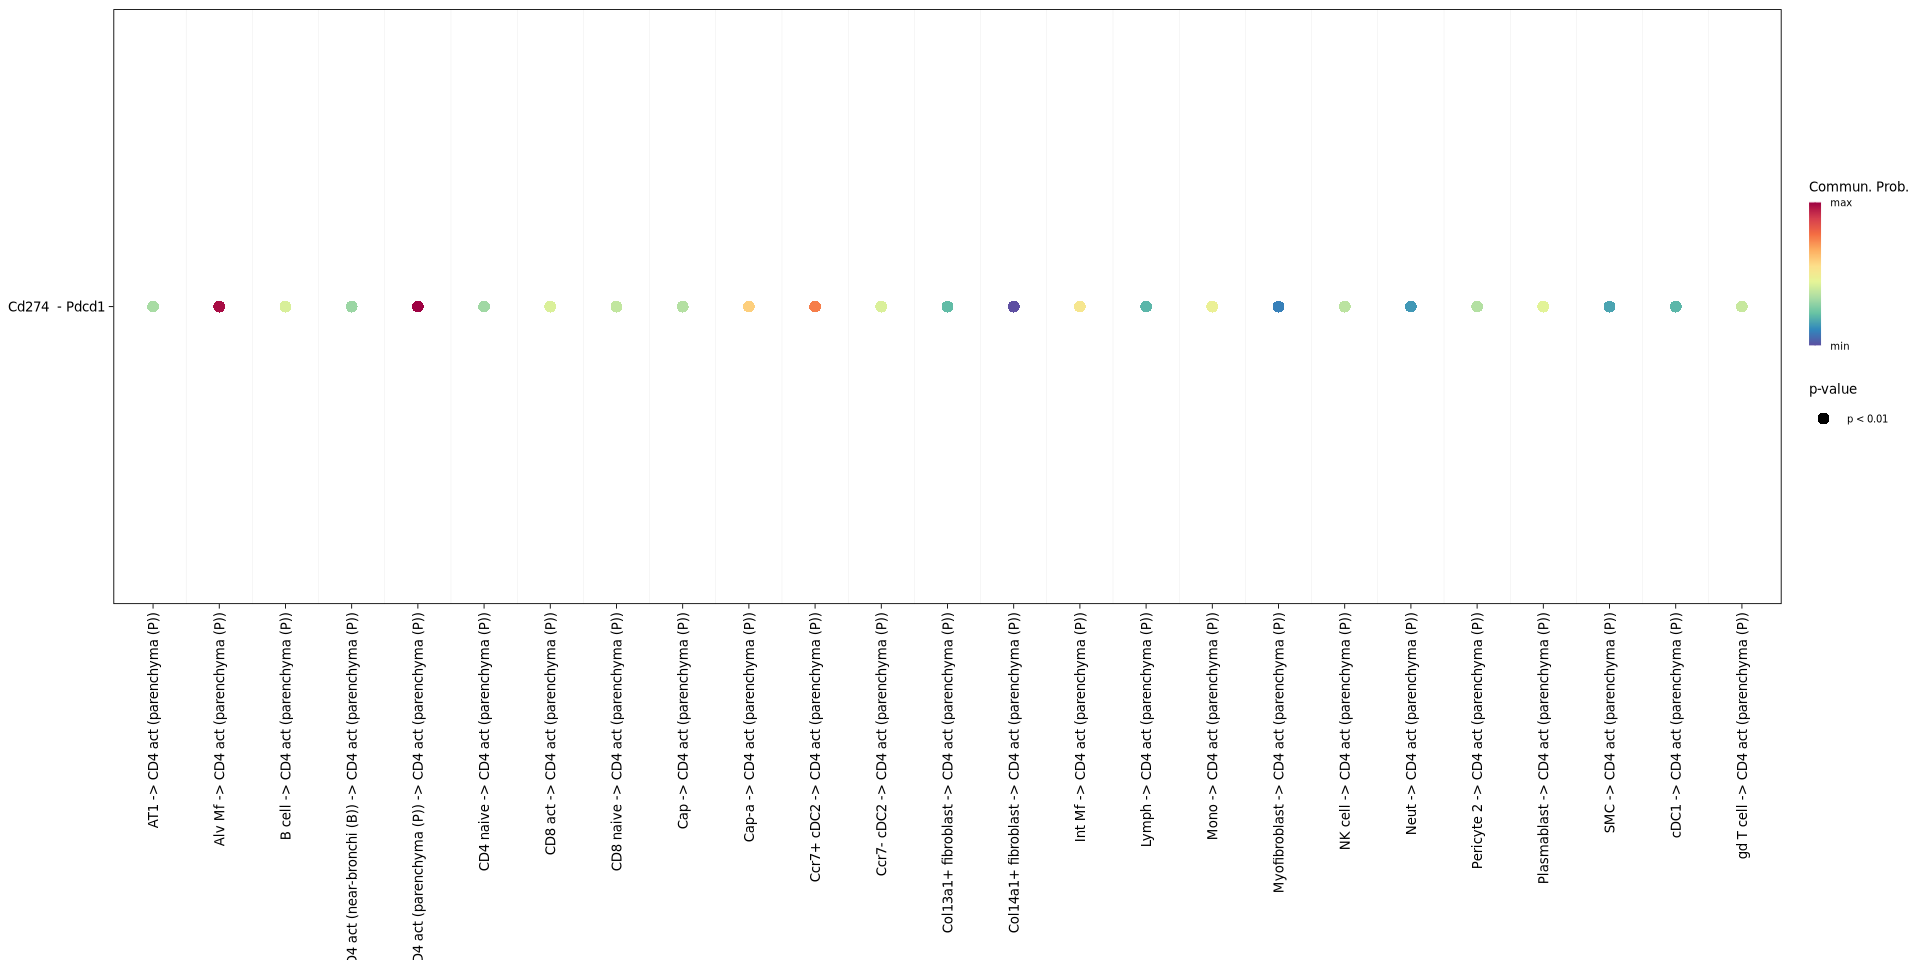

Comparing communications on a single object 




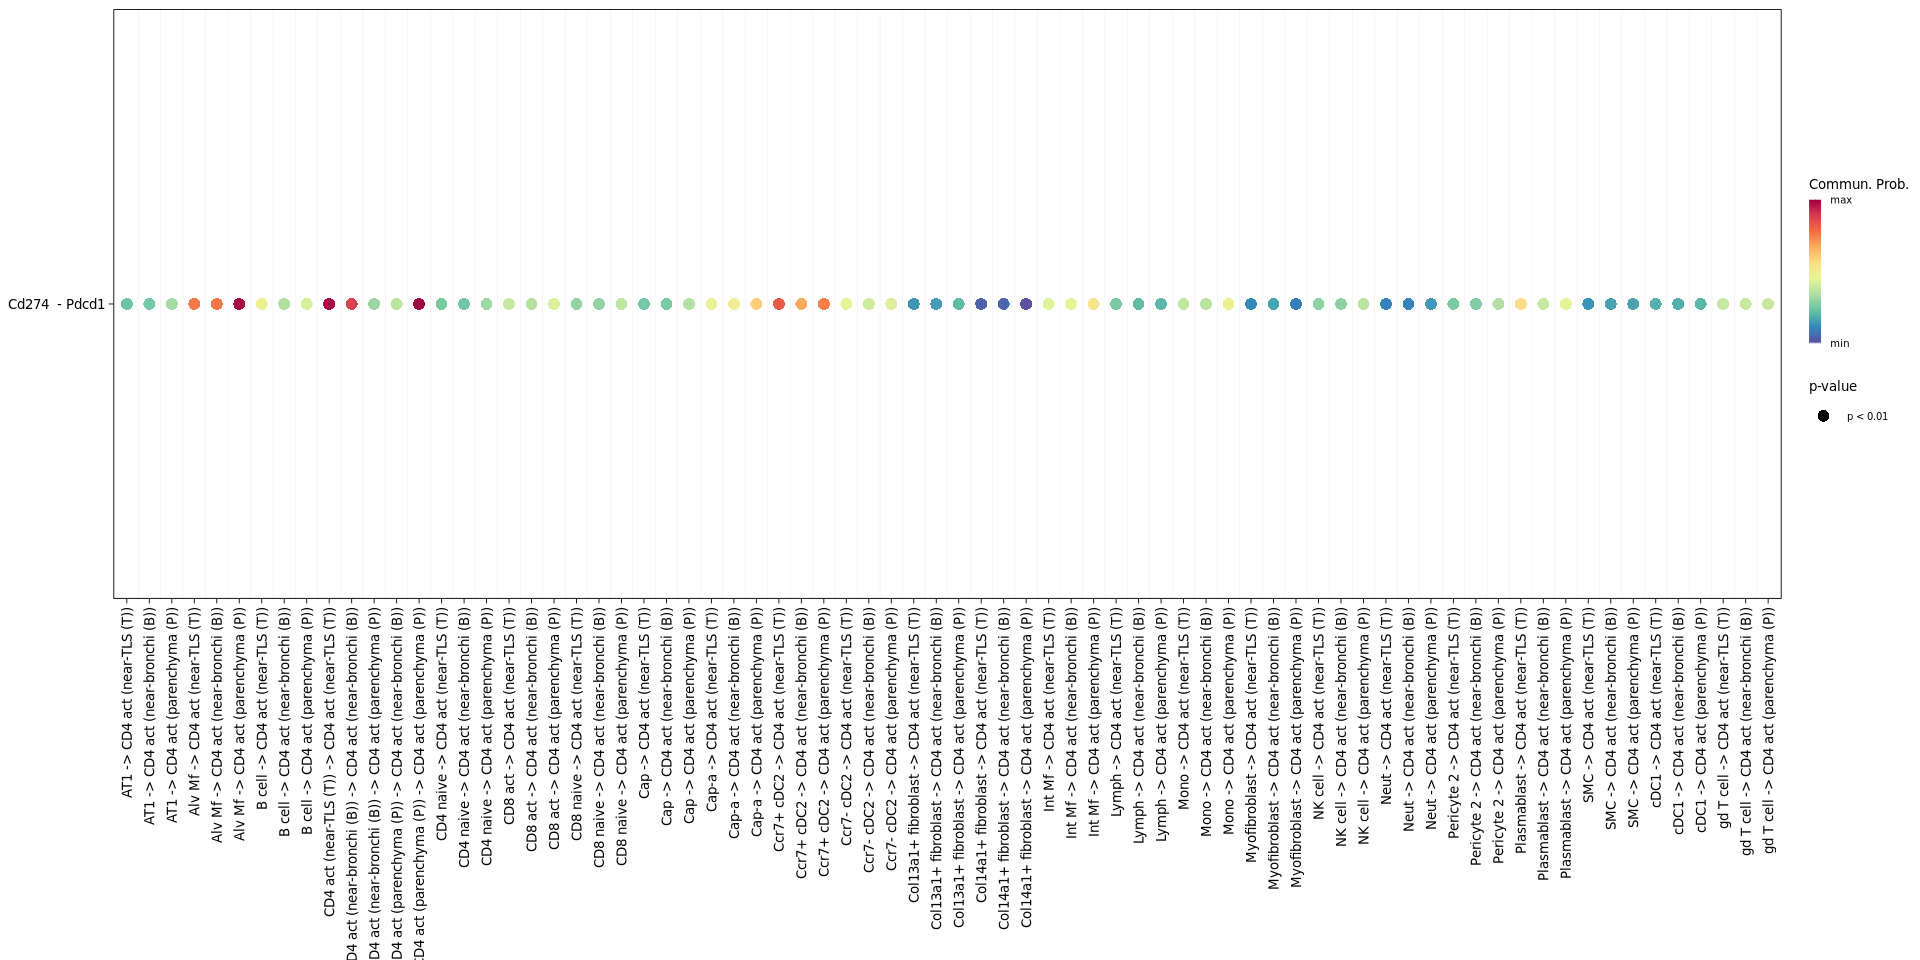

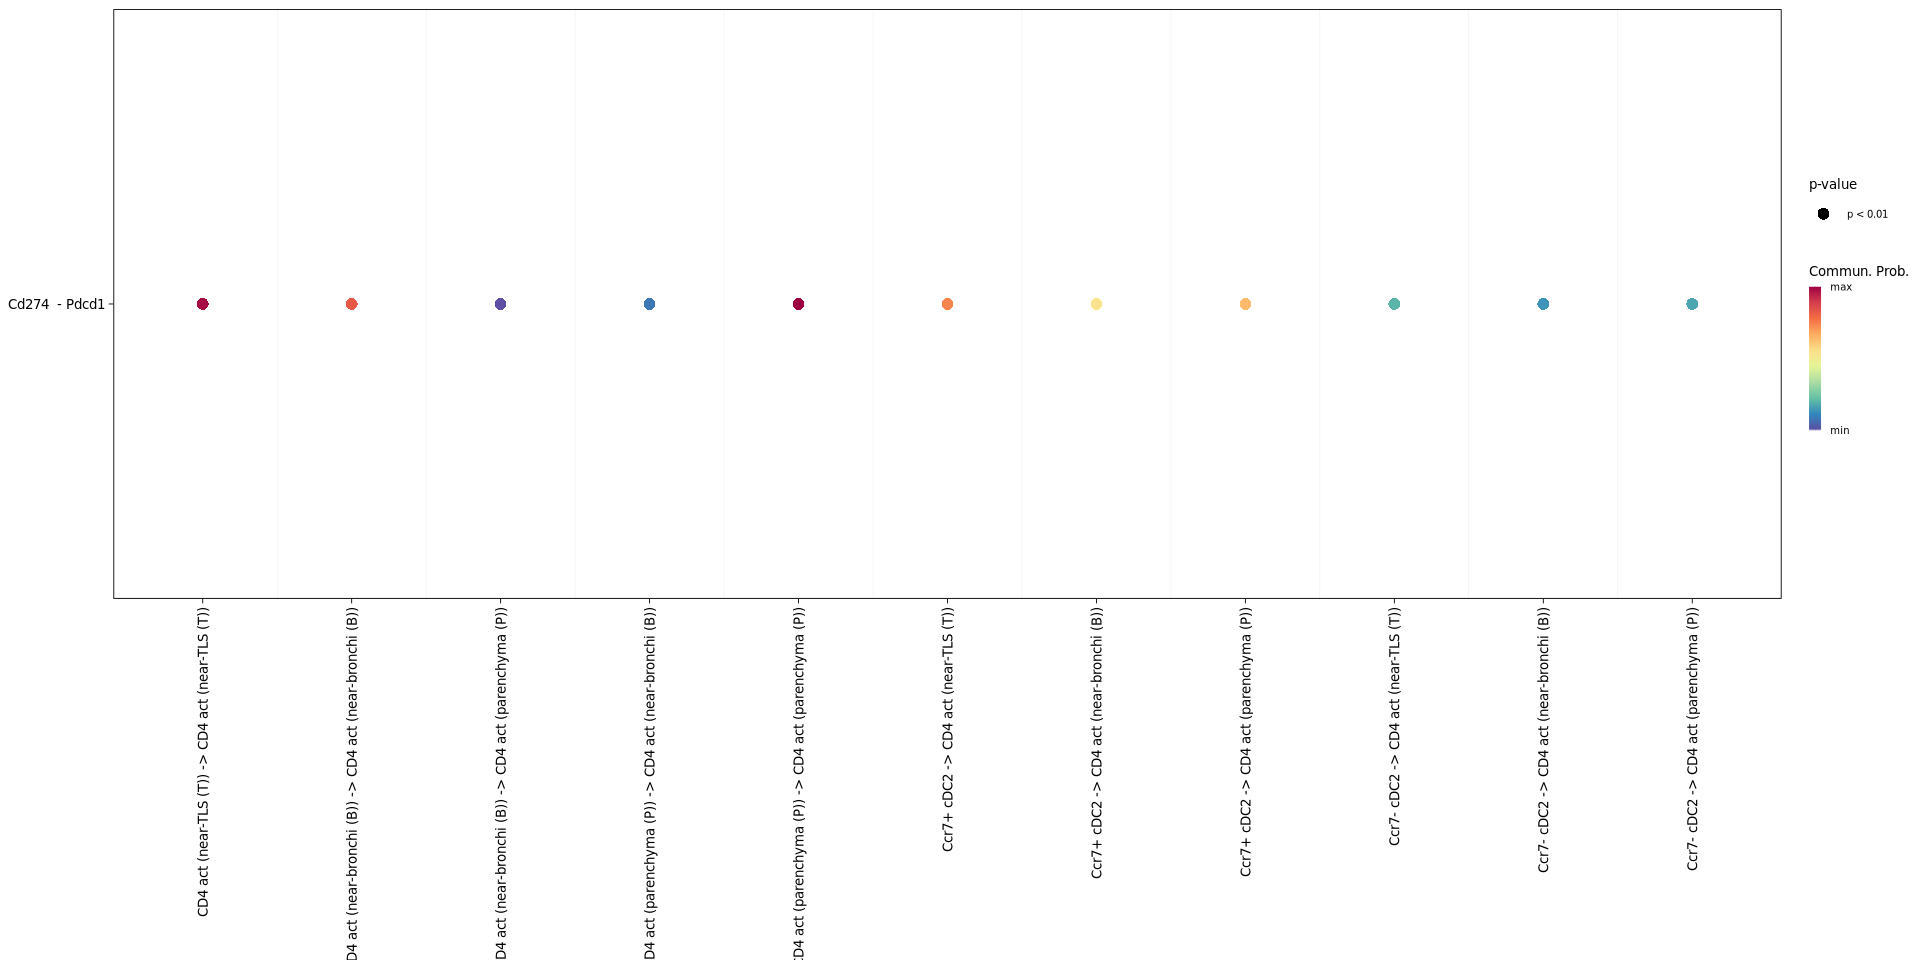

In [25]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("PD-L1"))
pairLR.use

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c('CD4 act (near-TLS (T))'),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c('CD4 act (near-bronchi (B))'),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c('CD4 act (parenchyma (P))'),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

options(repr.plot.width = 16, repr.plot.height = 8)
netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c('CD4 act (near-TLS (T))', 'CD4 act (near-bronchi (B))', 'CD4 act (parenchyma (P))'),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

options(repr.plot.width = 16, repr.plot.height = 8)
netVisual_bubble(
  cellchat,
  sources.use = c('CD4 act (near-TLS (T))', 'CD4 act (near-bronchi (B))', 'CD4 act (parenchyma (P))', 'Alf Mf', 'Ccr7+ cDC2', 'Ccr7- cDC2'),
  targets.use = c('CD4 act (near-TLS (T))', 'CD4 act (near-bronchi (B))', 'CD4 act (parenchyma (P))'),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

## Other interaction plots

In [166]:
spatialFeaturePlot(cellchat, pairLR.use = "IL33_IL1RL1", point.size = 0.5, do.binary = FALSE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

ERROR: Error in spatialFeaturePlot(cellchat, pairLR.use = "IL33_IL1RL1", point.size = 0.5, : Please check your input! 


In [ ]:
spatialFeaturePlot(cellchat, pairLR.use = "CXCL13_CXCR5", point.size = 0.5, do.binary = FALSE, cutoff = 0.05, enriched.only = F, color.heatmap = "Reds", direction = 1)

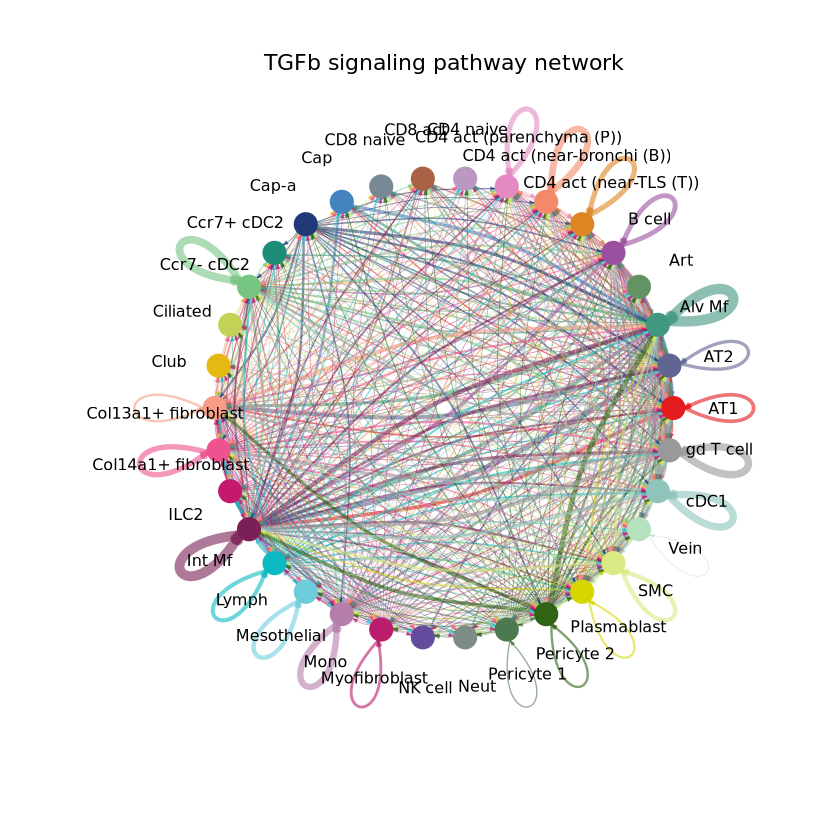

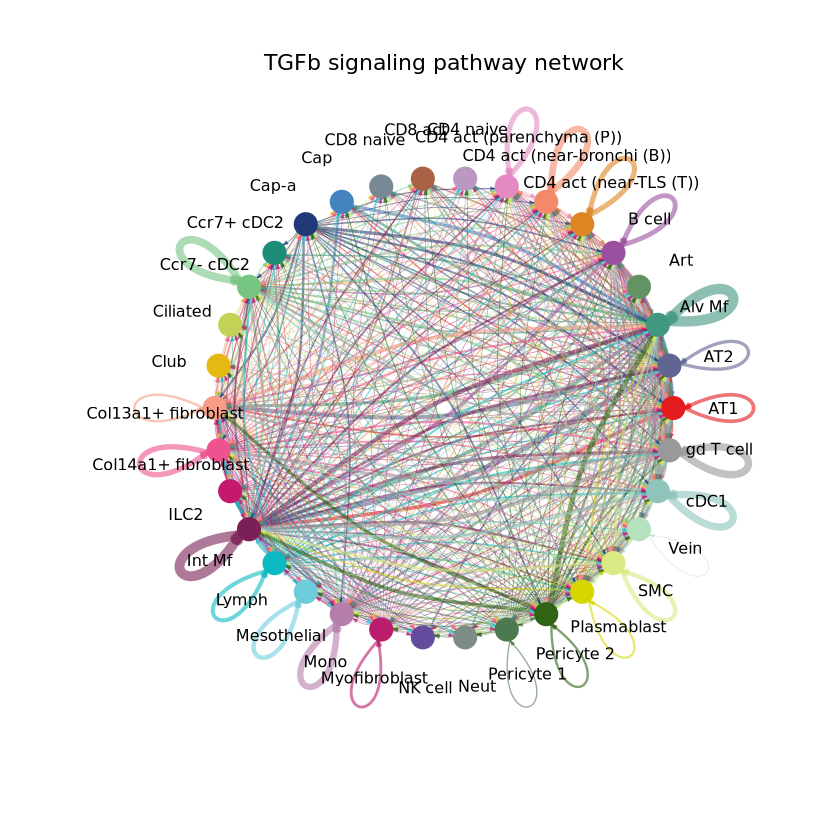

In [162]:
pathways.show <- c("TGFb") 
# Circle plot
par(mfrow=c(1,1), xpd=TRUE)
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")

In [34]:
print(netVisual_chord_gene(cellchat, sources.use = NULL, targets.use = c('CD4 act (near-TLS (T))')))
# print(netVisual_chord_gene(cellchat, sources.use = c("B cell"), targets.use = c('CD4 act (near-bronchi (B))')))
# print(netVisual_chord_gene(cellchat, sources.use = c("B cell"), targets.use = c('CD4 act (parenchyma (P))')))

ERROR: Error: Maybe your `gap.degree` is too large so that there is no space to
allocate sectors.


## Figure 3g and extended data figure 3d

In [30]:
create_plots <- function(cellchat_out_dir, name) {
    path =  file.path(cellchat_out_dir, paste0("cellchat_trim05_",name,".rds"))
    cellchat <- readRDS(path)
    # # change the order of the labels
    # cellchat@meta$labels <- forcats::fct_relevel(cellchat@meta$labels, "P14 top", "P14 crypt", "P14 muscularis")
    # cellchat <- updateClusterLabels(cellchat, new.order = levels(cellchat@meta$labels))

    cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

    pdf(file = file.path(cellchat_out_dir, paste0("cc_",name,".pdf")))
    plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming"))
    plot.new()
    plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing"))
    dev.off()
}

In [32]:
name = "HDM_day3"
create_plots(cellchat_out_dir, name)

pdf 
  2

[[1]]

[[2]]



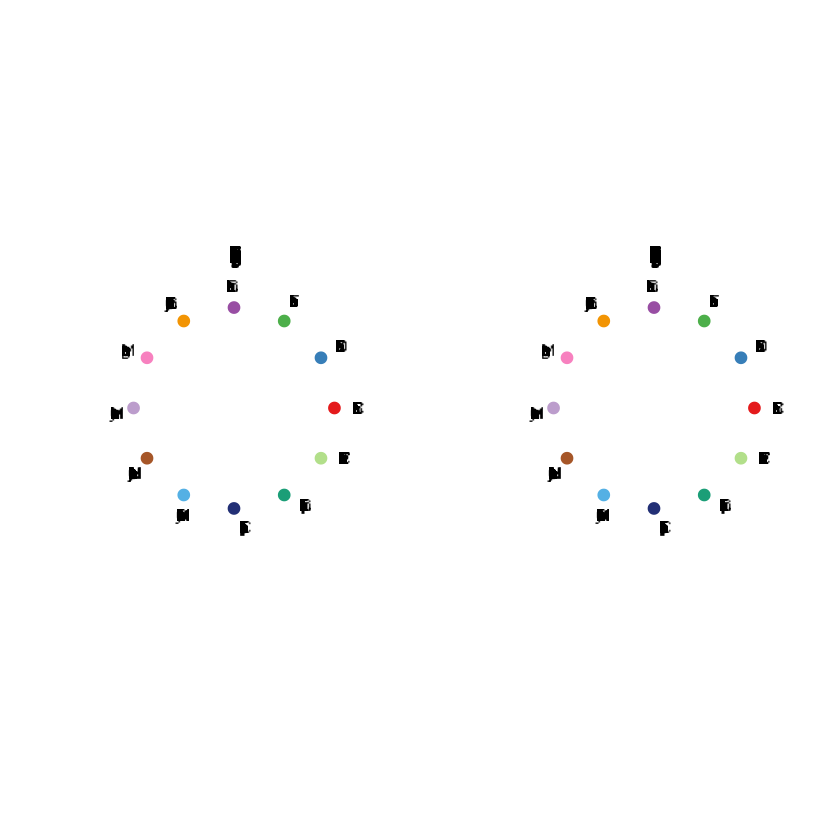

[[1]]

[[2]]

[[3]]

[[1]]

[[2]]

[[3]]



[[1]]

[[2]]

[[3]]


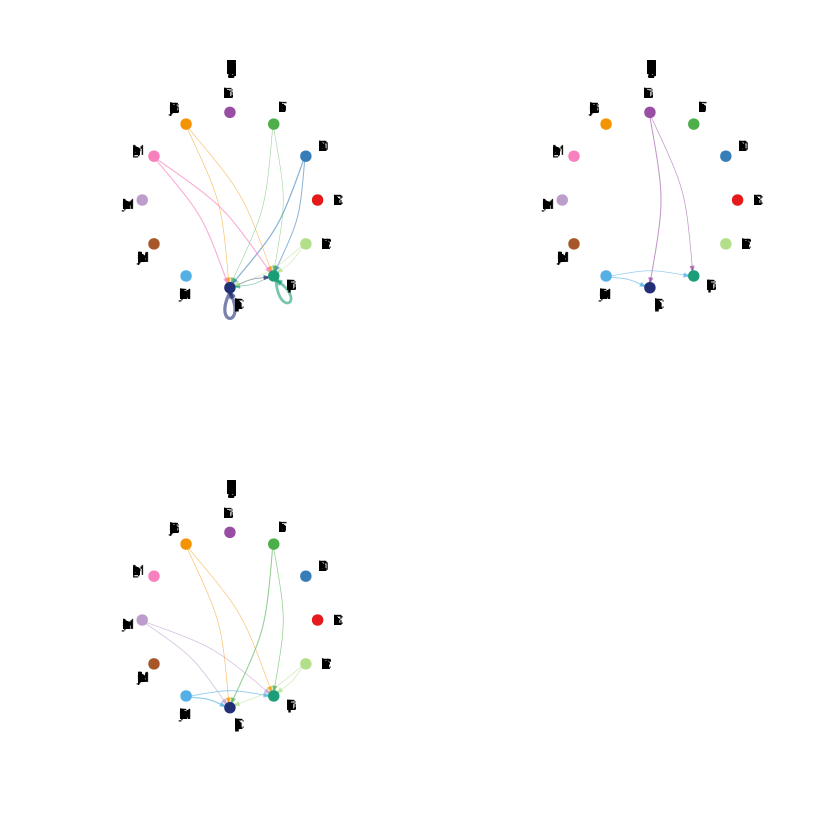

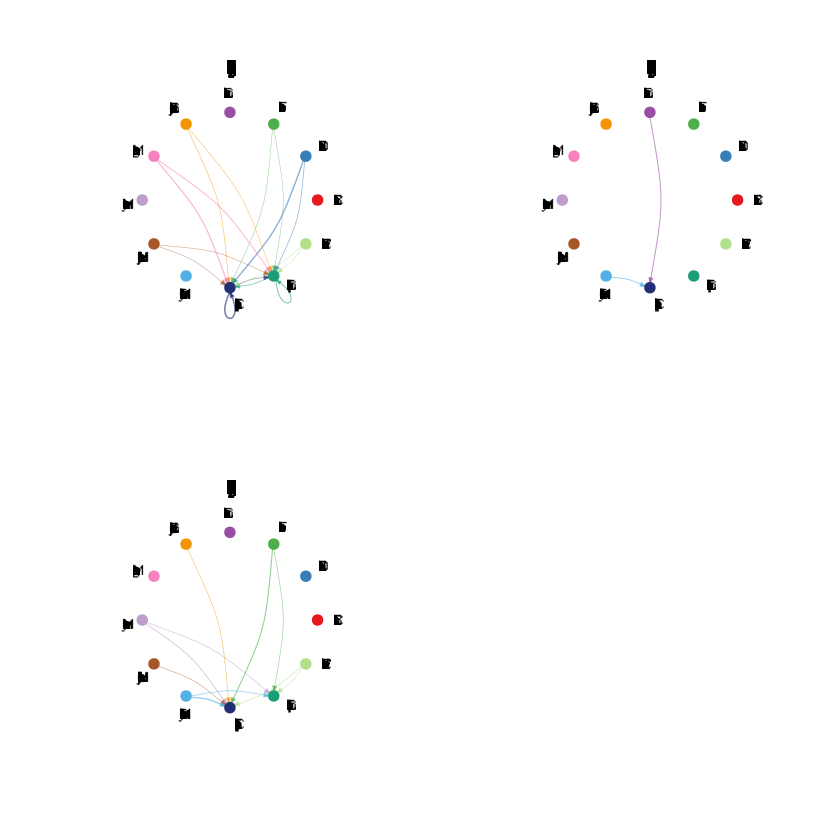

In [6]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("TGFb") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/TGFb_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]



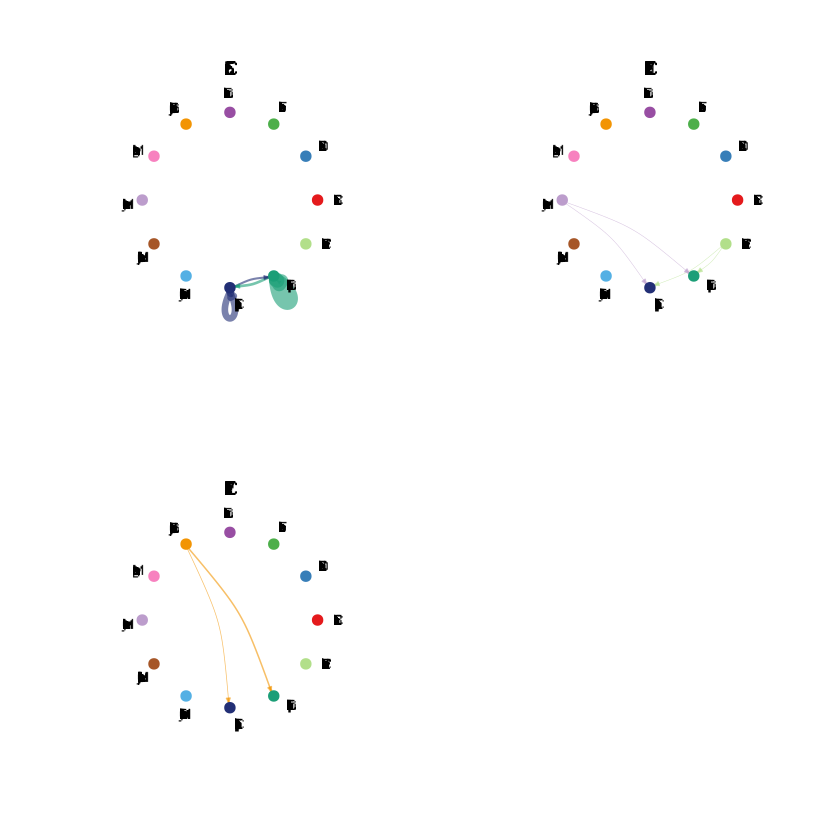

[[1]]

[[2]]

[[3]]



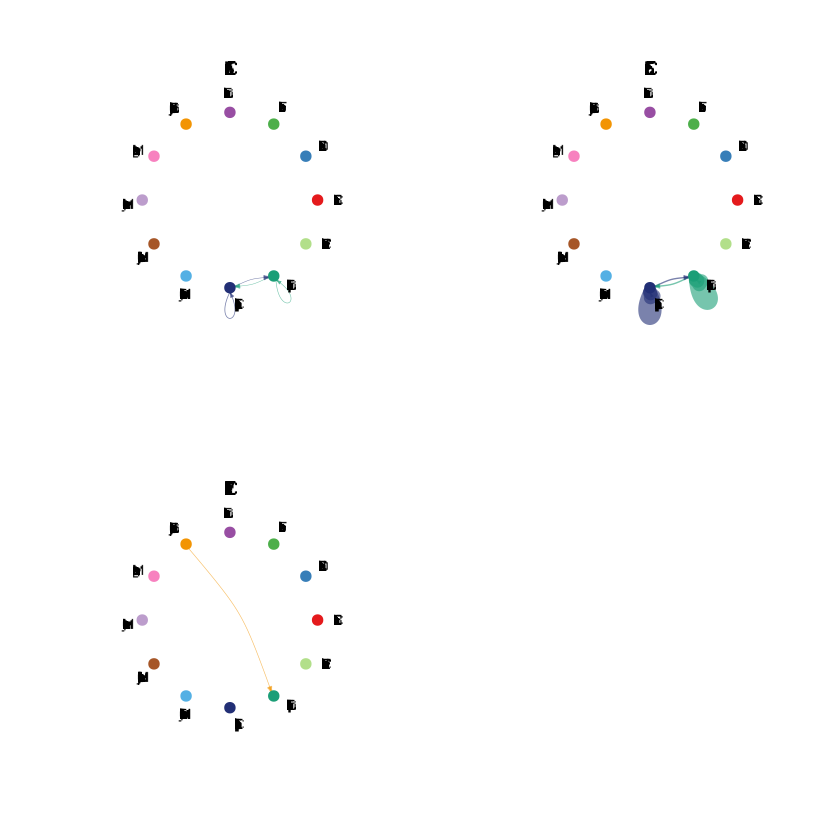

[[1]]

[[2]]



[[1]]

[[2]]


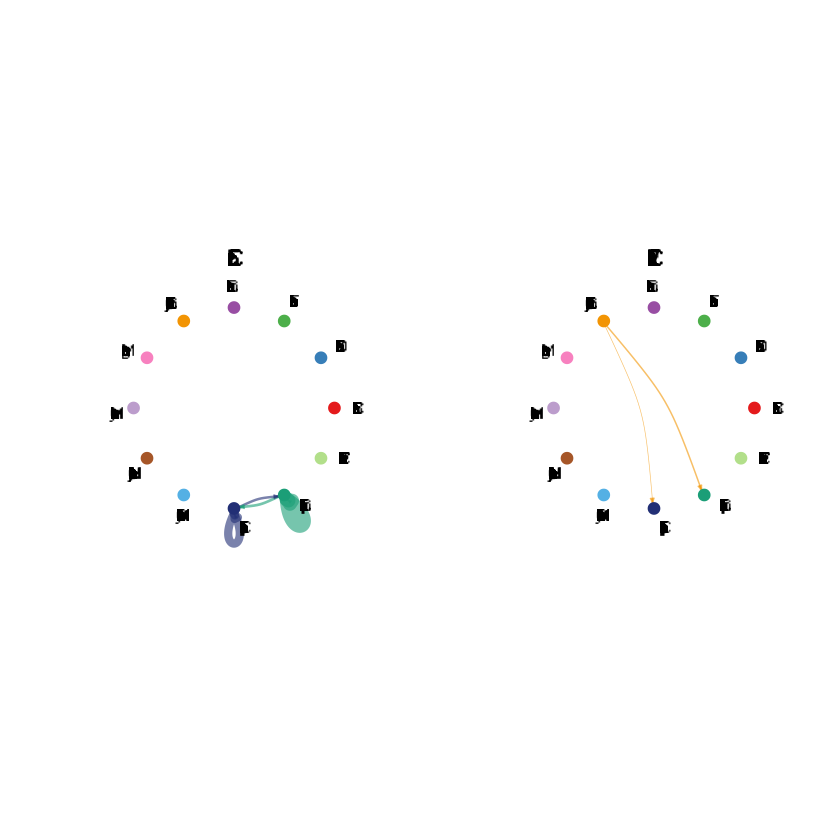

In [7]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]

[[4]]



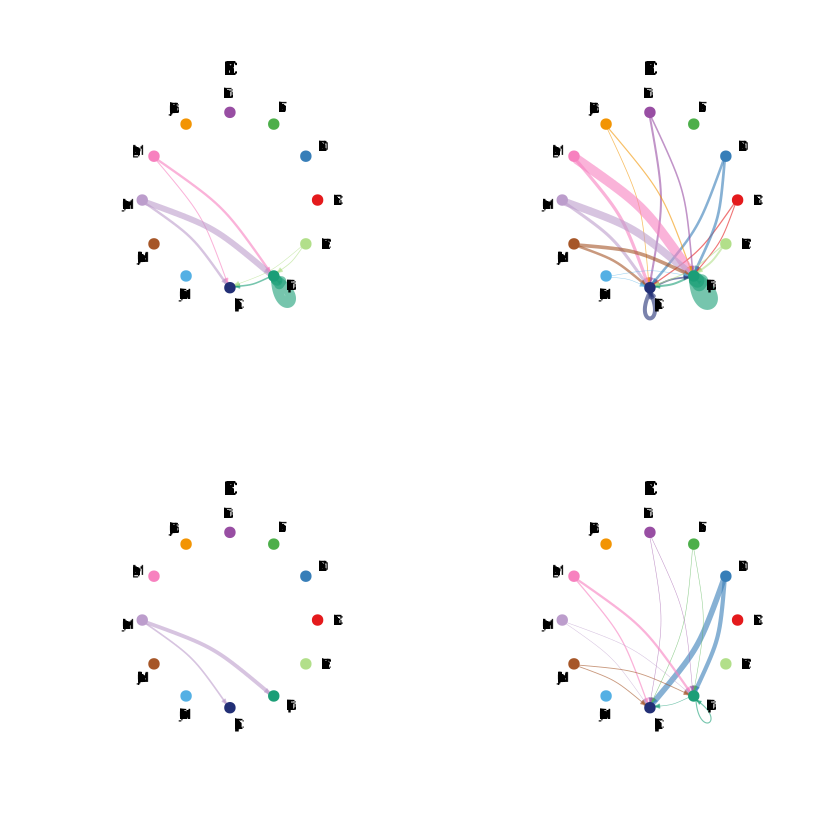

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]



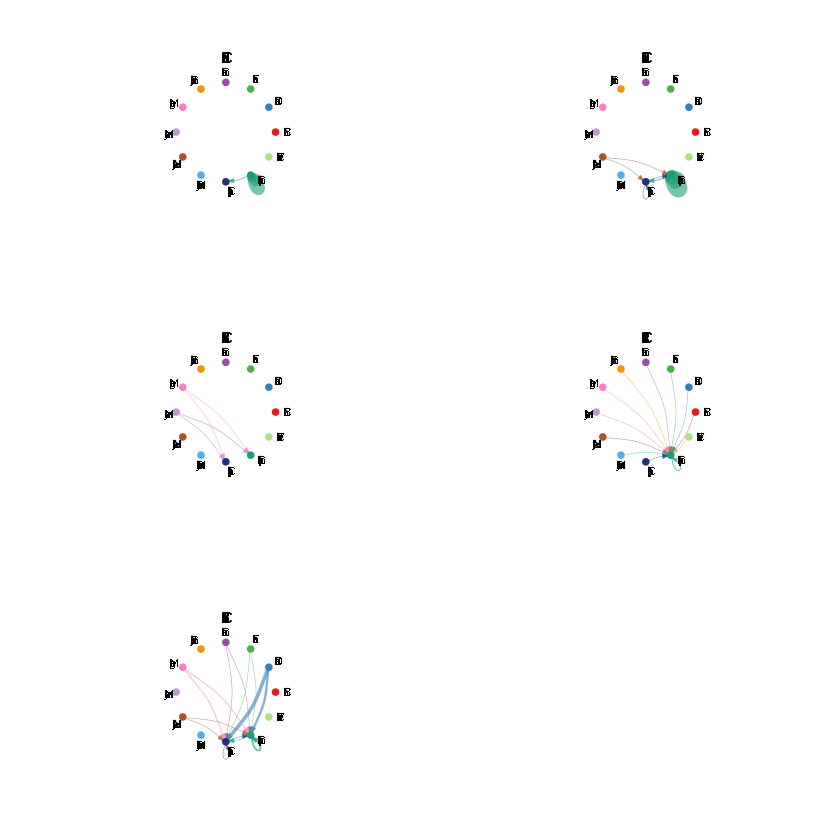

[[1]]

[[2]]

[[3]]

[[4]]



[[1]]

[[2]]

[[3]]

[[4]]


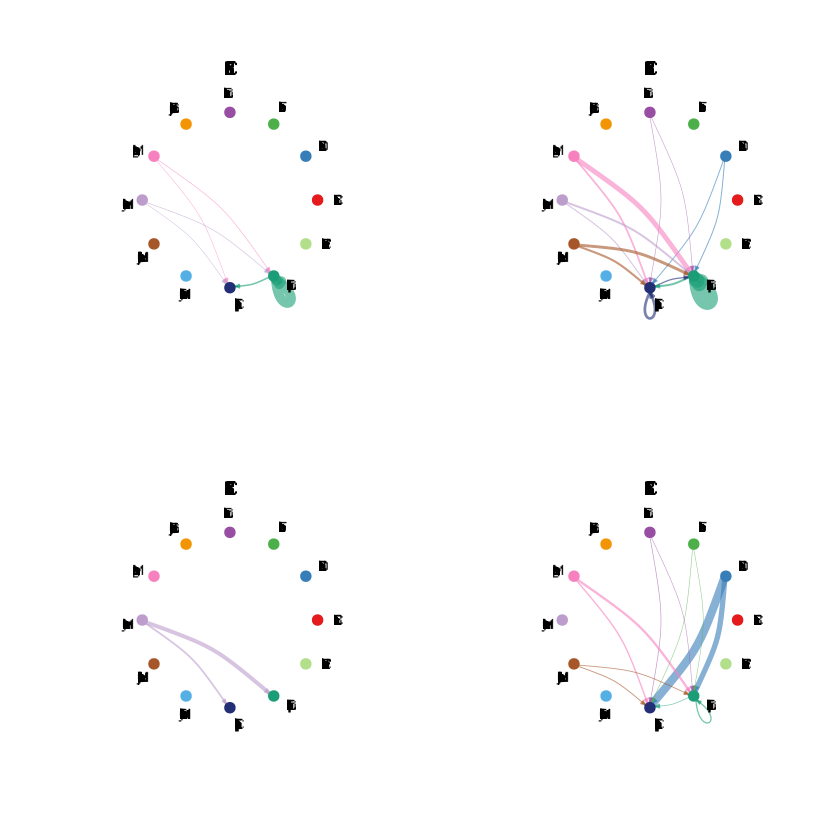

In [8]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CXCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CXCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]

[[4]]



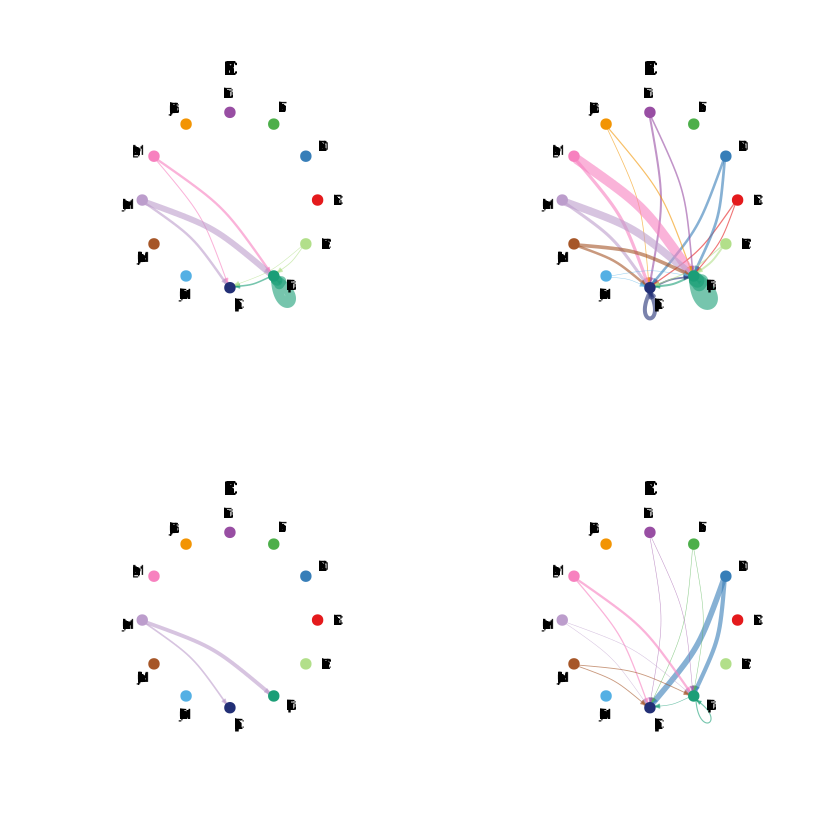

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]



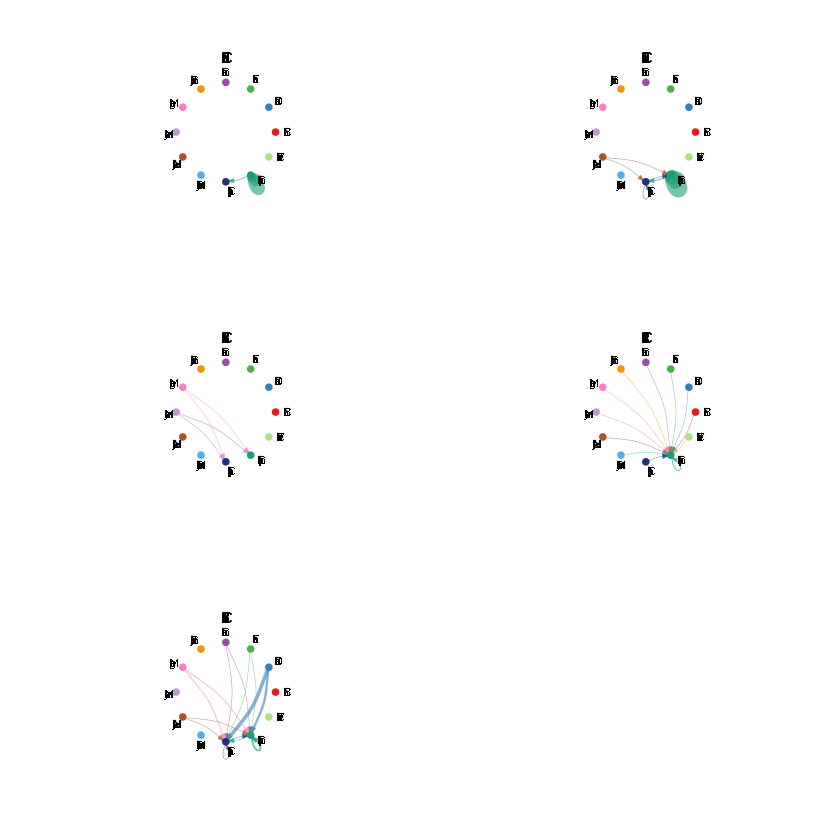

[[1]]

[[2]]

[[3]]

[[4]]



[[1]]

[[2]]

[[3]]

[[4]]


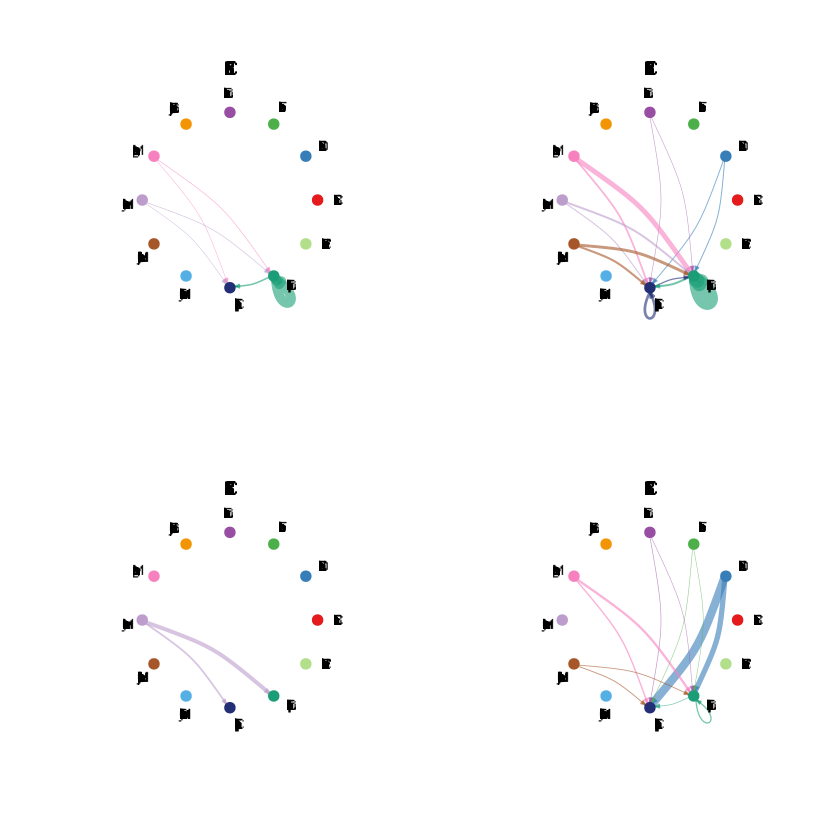

In [9]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CXCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CXCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]



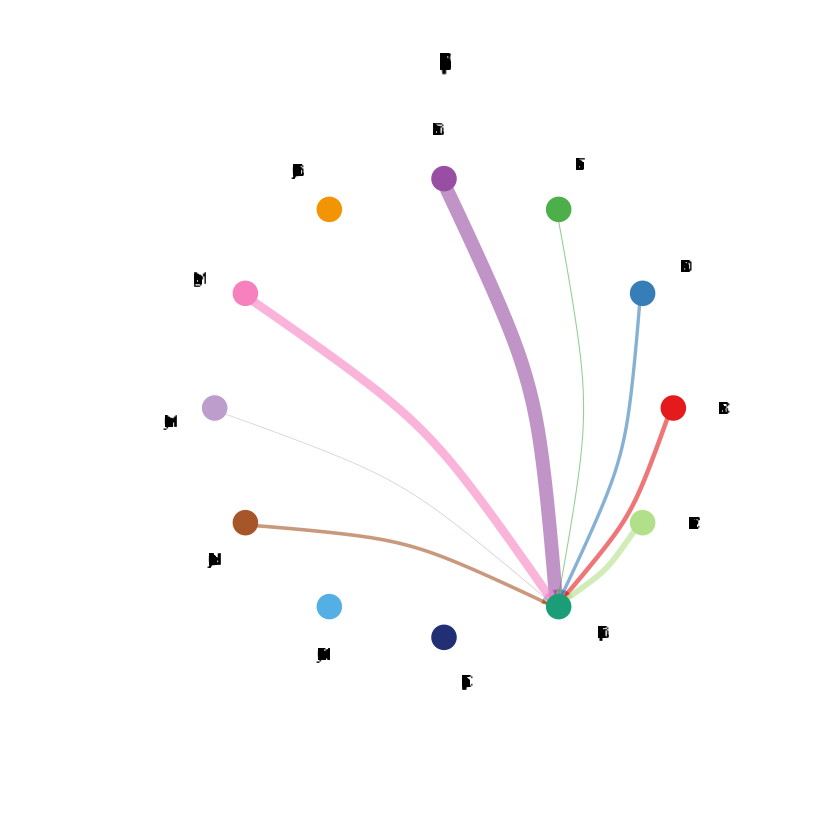

[[1]]

[[2]]

[[3]]

[[1]]

[[2]]

[[3]]



[[1]]

[[2]]

[[3]]


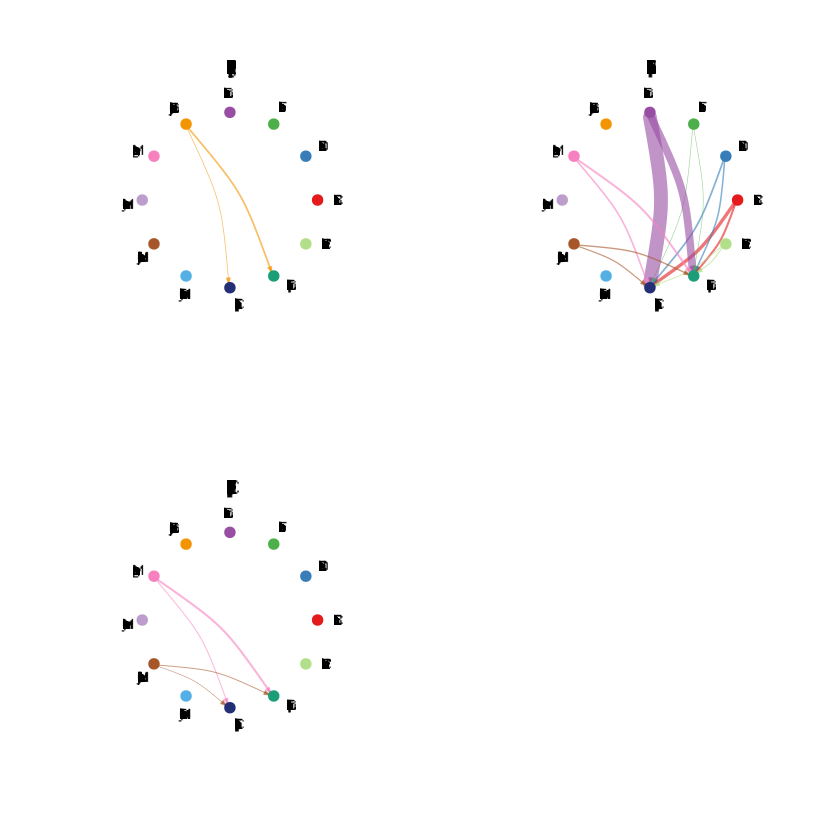

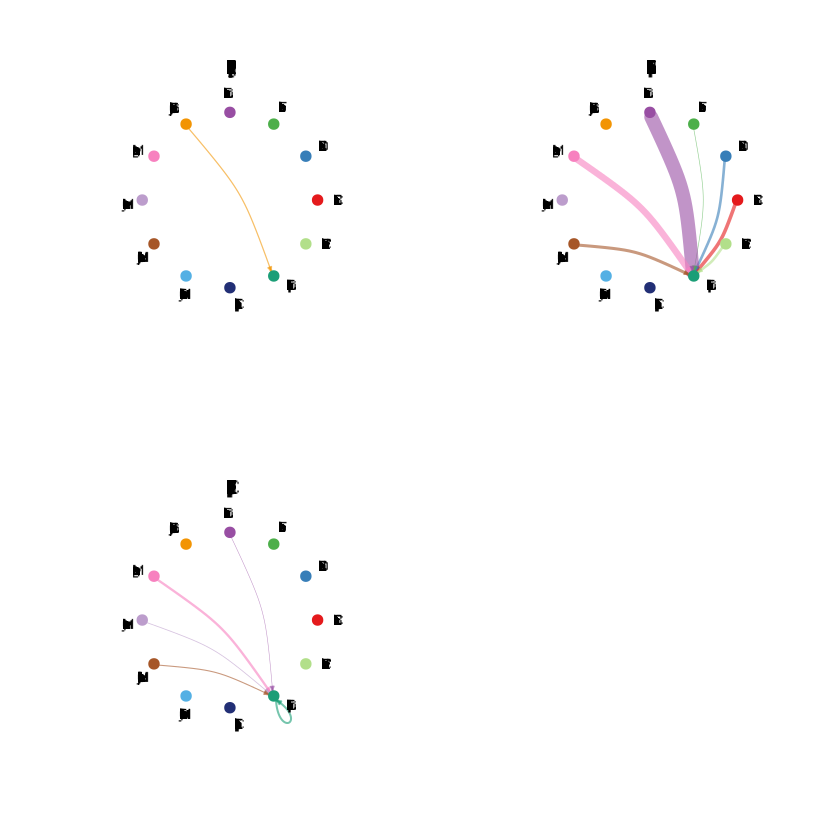

In [10]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("IL2") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/IL2_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p
